# **Цель и описание проекта**

В документе предоставлены данные по одному из проектов для когорт, установивших игру с 21.09.23 по 28.09.23:


### **Пояснение к таблицe:**
#### Лист *ad revenue* (данные по рекламному заработку):
- *Install_date* — дата установки игры пользователем
- *Event_date* — дата совершения события
- *Event_revenue* — рекламный заработок
- *Platform* — платформа
- *User_id* — уникальный идентификатор пользователя

#### Лист *installs data* (данные по количеству инсталлов):
- *Install_date* — дата
- *installs* — количество инсталлов
- *Platform* — платформа

# Цели
1. Провести исследовательский анализ данных (EDA) для выявления общих закономерностей и распределений.
2. Рассчитать ключевые метрики для когорт:
   - **DAU (Daily Active Users)** — ежедневно активные пользователи.
   - **Retention (Коэффициент удержания)** — процент пользователей, продолжающих использовать приложение.
   - **ARPU (Average Revenue Per User)** — средняя выручка на одного пользователя.
   - **Revenue (выручка)** и **Cumulative Revenue (накопительная выручка)**.
   - **Revenue retention**.
3. Проверить статистические гипотезы о влиянии размеров когорт и активности пользователей на выручку.
4. Построить прогноз удержания пользователей (Retention) и за первый месяц.

---

# План выполнения задач

## 1. Исследовательский анализ данных (EDA)
- Импорт данных с листов *ad revenue* и *installs data*.
- Проверка и обработка пропусков, анализ типов данных.
- Исследование распределений ключевых переменных (выручка, активные пользователи, размеры когорт).
- Выявление возможных аномалий и выбросов.

## 2. Расчёт, анализ и визуализация ключевых метрик по когортам

### DAU (Daily Active Users)
- Подсчитайте количество уникальных пользователей (User_id), активных каждый день.
- Визуализируйте динамику DAU по когортам и платформам.

### Retention Rate (Коэффициент удержания)
- Рассчитайте процент пользователей, активных в N-й день после установки.
- Постройте тепловую таблицу удержания (*cohort retention heatmap*) и линейный график по когортам.

### Revenue (Выручка)
- Рассчитать суммарную выручку по дням для каждой когорты.
- Построить тепловую таблицу и график распределения выручки по когортам.

### Cumulative Revenue (Накопительная выручка)
- Рассчитать кумулятивную выручку.
- Построить график роста накопительной выручки для когорт.


### ARPU (Average Revenue Per User)
- Рассчитайте среднюю выручку на пользователя.
- Постройте графики ARPU по когортам и платформам.

## 3. Проверка гипотез



## 4. Прогнозирование удержания и роста выручки

- **Прогноз удержания пользователей (Retention)**:
  - Постройте модель удержания для прогнозирования Retention Rate до 30-го дня.
  - Постройте график удержания для когорт за первый месяц.

#### **Сбор, анализ и предобработка данных**

In [3]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from datetime import date

In [4]:
# Чтение всех листов из Excel-файла
file_path = r'/content/Ad_revenue.xlsx'

# Чтение данных с разных листов
ad_revenue = pd.read_excel(file_path, sheet_name='ad revenue')
installs_data = pd.read_excel(file_path, sheet_name='installs data')

In [5]:
# Проверка на наличие пустых значений в ad_revenue
print("Пустые значения в ad_revenue:")
print(ad_revenue.isnull().sum())

print("Пустые значения в installs_data:")
print(installs_data.isnull().sum())

Пустые значения в ad_revenue:
install_date       0
event_date         0
event_revenue    911
platform           0
user_id            0
dtype: int64
Пустые значения в installs_data:
install_date    0
installs        0
platform        0
dtype: int64


In [6]:
# Расчёт процента пропущенных значений в столбце event_revenue
missing_percentage_event_revenue = ad_revenue['event_revenue'].isnull().sum() / len(ad_revenue) * 100
print(f"Процент пропущенных значений в столбце event_revenue: {missing_percentage_event_revenue:.2f}%")

Процент пропущенных значений в столбце event_revenue: 1.16%


Процент пропущенных данных (1.16%) относительно мал, и их заполнение нулями не должно существенно повлиять на общую статистику. Пропущенные значения могут означать, что в эти моменты не было активности, связанной с доходом от рекламы, и поэтому их логично интерпретировать как нулевой доход. Заполнение пропусков нулями позволит избежать проблем при вычислениях метрик (ARPU, DAU и т.д.), так как модели и методы анализа не смогут работать с пропущенными значениями.

In [7]:
# Заполнение пропусков нулями
ad_revenue = ad_revenue.fillna(0)

In [8]:
print(ad_revenue['event_revenue'].describe())

count    78723.000000
mean         0.110372
std          0.192495
min          0.000000
25%          0.024800
50%          0.051240
75%          0.118548
max          7.911244
Name: event_revenue, dtype: float64


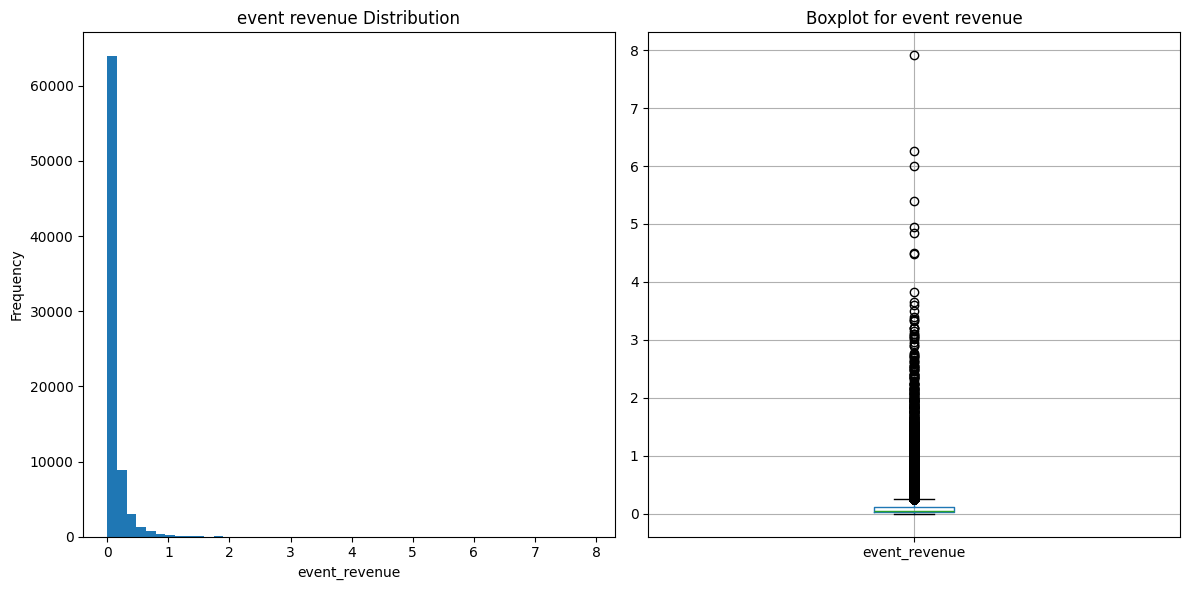

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # figsize регулирует размер графиков

# Построение гистограммы event_revenue
ad_revenue['event_revenue'].plot(kind='hist', bins=50, ax=axs[0], title='event revenue Distribution')
axs[0].set_xlabel('event_revenue')
axs[0].set_ylabel('Frequency')

# Построение Boxplot event_revenue
ad_revenue.boxplot(column='event_revenue', ax=axs[1])
axs[1].set_title('Boxplot for event revenue')

# Отображение графиков
plt.tight_layout()
plt.show()

Рассмотрим как распределено *event_revenue* на разных платформах

In [10]:
# Фильтрация данных по платформам
android_data = ad_revenue[ad_revenue['platform'] == 'android']
ios_data = ad_revenue[ad_revenue['platform'] == 'ios']

In [11]:
print("Описательная статистика для Android:")
print(android_data['event_revenue'].describe())

# Описательная статистика для iOS
print("\nОписательная статистика для iOS:")
print(ios_data['event_revenue'].describe())

Описательная статистика для Android:
count    72360.000000
mean         0.107987
std          0.191550
min          0.000000
25%          0.024210
50%          0.049446
75%          0.113870
max          7.911244
Name: event_revenue, dtype: float64

Описательная статистика для iOS:
count    6363.000000
mean        0.137504
std         0.200965
min         0.000000
25%         0.034426
50%         0.073950
75%         0.165450
max         3.603033
Name: event_revenue, dtype: float64


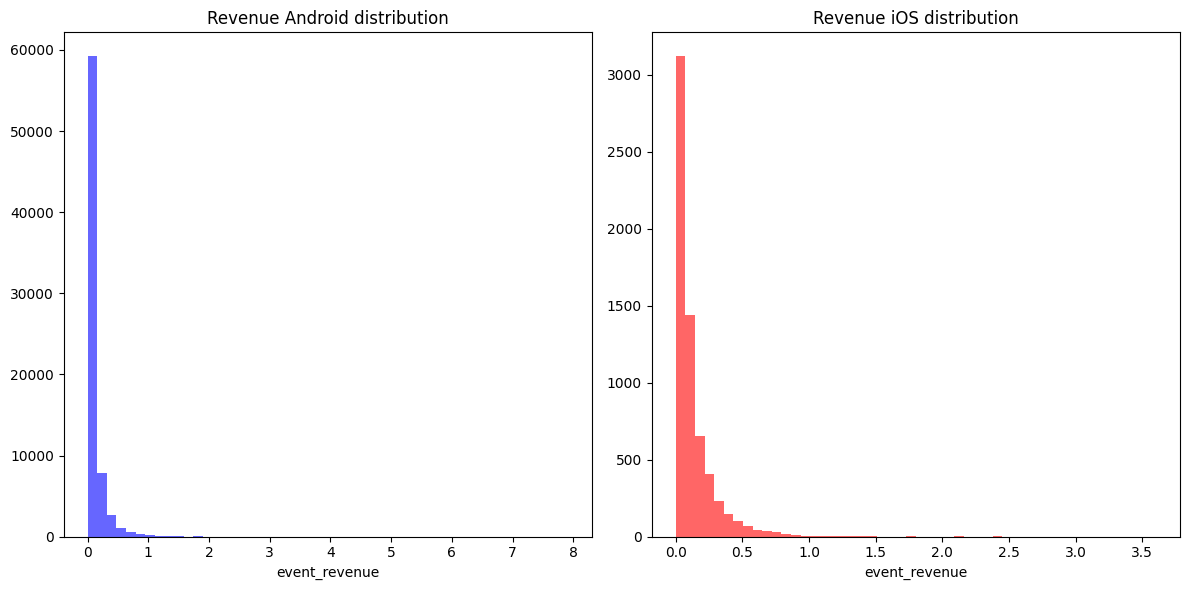

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма для Android
axs[0].hist(android_data['event_revenue'], bins=50, alpha=0.6, color='blue')
axs[0].set_title('Revenue Android distribution')
axs[0].set_xlabel('event_revenue')

# Гистограмма для iOS
axs[1].hist(ios_data['event_revenue'], bins=50, alpha=0.6, color='red')
axs[1].set_title('Revenue iOS distribution')
axs[1].set_xlabel('event_revenue')

# Настройка отображения
plt.tight_layout()
plt.show()

<ipython-input-13-7bf553936d2c>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([android_data['event_revenue'], ios_data['event_revenue']], labels=['Android', 'iOS'])


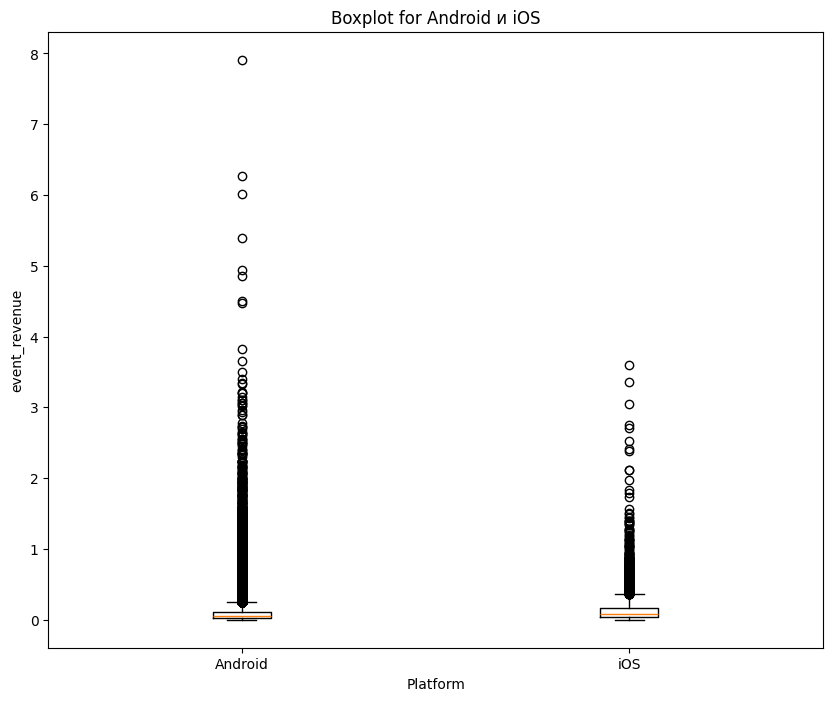

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

# Boxplot для Android и iOS
ax.boxplot([android_data['event_revenue'], ios_data['event_revenue']], labels=['Android', 'iOS'])

# Настройка графика
ax.set_title('Boxplot for Android и iOS')
ax.set_ylabel('event_revenue')
ax.set_xlabel('Platform')

# Отображение графика
plt.show()

Распределение суммы event_revenue по пользователям:

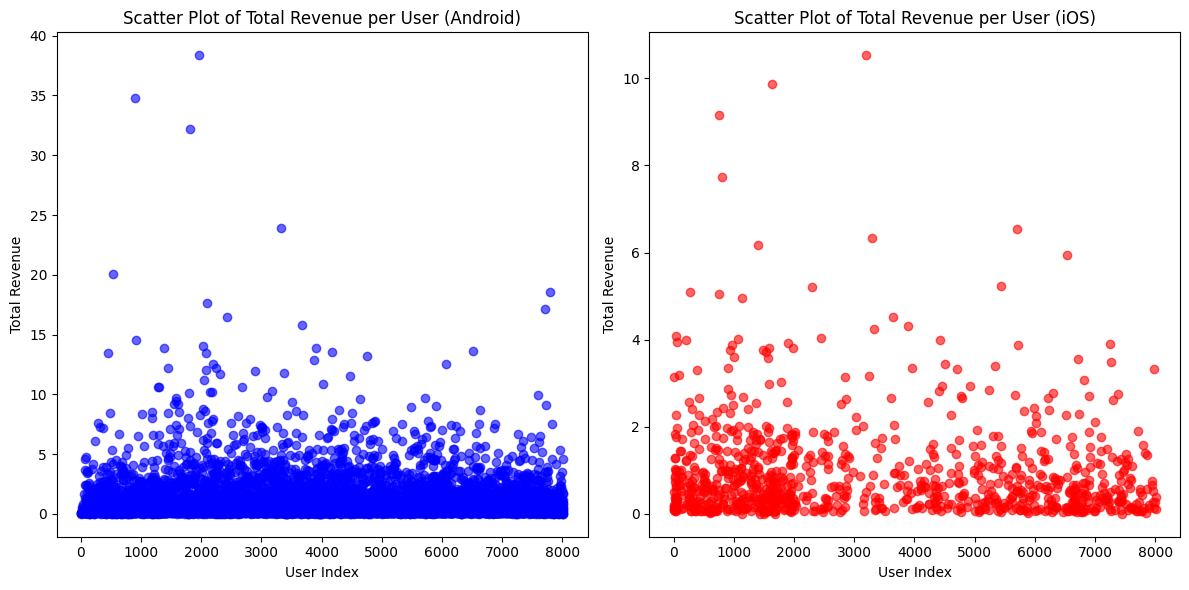

In [14]:
# Grouping data by user_id and platform, summing the total revenue for each user
grouped_data_platform = ad_revenue.groupby(['user_id', 'platform']).agg(total_revenue=('event_revenue', 'sum')).reset_index()

# Creating subplots for Android and iOS
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Android
android_data = grouped_data_platform[grouped_data_platform['platform'] == 'android']
axs[0].scatter(android_data.index, android_data['total_revenue'], color='blue', alpha=0.6)
axs[0].set_title('Scatter Plot of Total Revenue per User (Android)')
axs[0].set_xlabel('User Index')
axs[0].set_ylabel('Total Revenue')

# Plot for iOS
ios_data = grouped_data_platform[grouped_data_platform['platform'] == 'ios']
axs[1].scatter(ios_data.index, ios_data['total_revenue'], color='red', alpha=0.6)
axs[1].set_title('Scatter Plot of Total Revenue per User (iOS)')
axs[1].set_xlabel('User Index')
axs[1].set_ylabel('Total Revenue')

# Display the plots
plt.tight_layout()
plt.show()

#### **Выводы:**

#### **Статистические различия:**
- **Среднее значение выручки** на iOS выше, чем на Android, несмотря на наличие более крупных выбросов на Android. Это может означать, что пользователи iOS в целом приносят больше выручки, но без столь резких скачков, как на Android.
- **Стандартное отклонение (std)** выше на Android, что также указывает на большую изменчивость данных.

#### **Распределение event_revenue:**
- На гистограммах видно, что распределение выручки для обеих платформ имеет сильный сдвиг к нулю, с редкими случаями высоких значений.
- Выбросы более выражены для *Android*, что может говорить о том, что на этой платформе есть пользователи, которые генерируют высокие суммы выручки.
На *iOS* такие пользователи также есть, но в меньшем количестве, и их выручка не достигает таких высоких значений.

#### **event_revenue по пользователям:**
На scatter-плотах по пользователям видно, что конкретные пользователи, особенно на платформе Android, могут генерировать большое суммарное количество выручки, что подтверждает гипотезу о том, что некоторые пользователи более активны или вовлечены, что приводит к значительным выбросам в их общей выручке.
Эти пользователи могут влиять на общие метрики, такие как ARPU.

Таким образом, можно сделать вывод, что на обеих платформах существуют пользователи с высокой активностью, но на Android эти выбросы выражены сильнее.

#### **Расчёт метрик**:

Объединение данных из двух листов по полю *Install_date* и *Platform*:

In [15]:
ad_revenue['event_date'] = pd.to_datetime(ad_revenue['event_date']).dt.date
ad_revenue['install_date'] = pd.to_datetime(ad_revenue['install_date']).dt.date
installs_data['install_date'] = pd.to_datetime(installs_data['install_date']).dt.date

In [16]:
# Создаем таблицу cohort_data с группировкой по install_date и platform
cohort_data = installs_data.groupby(['install_date', 'platform']).agg({
    'installs': 'sum'  # Суммируем количество инсталлов
}).reset_index()
cohort_data.columns = ['install_date', 'platform', 'cohort_size']

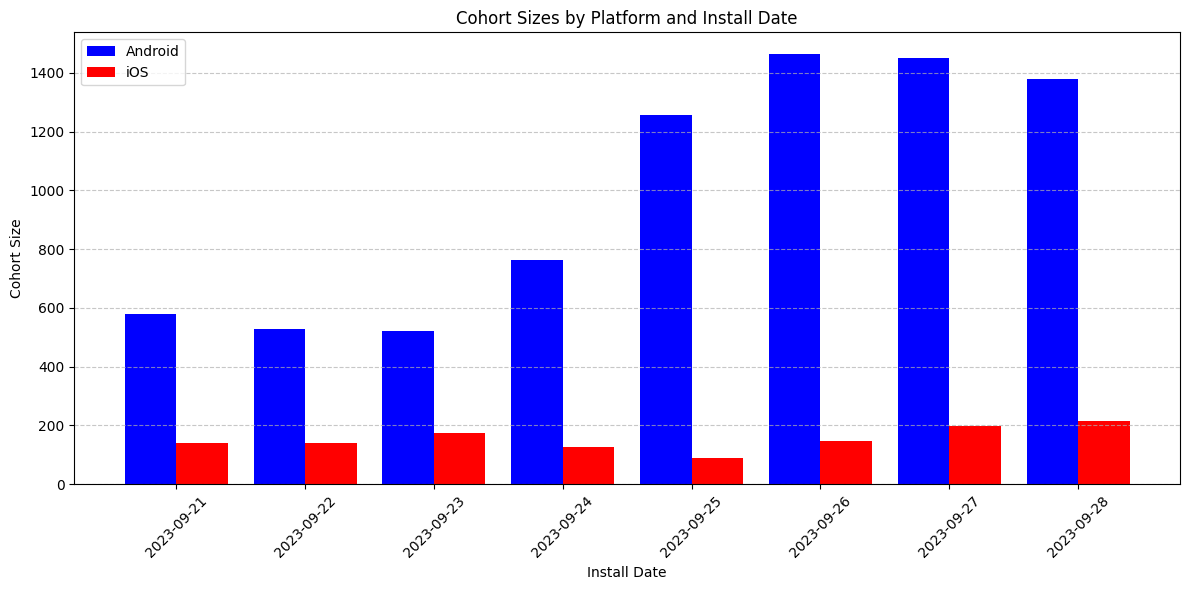

In [17]:
# Данные из cohort_data
install_dates = cohort_data['install_date'].unique()  # Уникальные даты установки
android_sizes = cohort_data[cohort_data['platform'] == 'android']['cohort_size'].values
ios_sizes = cohort_data[cohort_data['platform'] == 'ios']['cohort_size'].values

# Определяем положение столбиков
x = np.arange(len(install_dates))  # Позиции для каждой даты
width = 0.4  # Ширина столбиков

# Построение графика
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, android_sizes, width, label='Android', color='blue')
plt.bar(x + width/2, ios_sizes, width, label='iOS', color='red')

# Настройки графика
plt.xlabel('Install Date')
plt.ylabel('Cohort Size')
plt.title('Cohort Sizes by Platform and Install Date')
plt.xticks(ticks=x, labels=install_dates, rotation=45)  # Подписи оси X
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Показ графика
plt.show()

Когортные группы на Android значительно больше, чем на iOS. Например, для 25 сентября на Android 1258 установок, тогда как на iOS — всего 91. Это указывает на то, что пользователи Android более многочисленны или приложение более популярно на этой платформе.

Описание расчета метрик:
1. Группировка данных:
Данные группируются по install_date, event_date и platform.

2. Для каждой группы рассчитываются:
- *DAU* (Daily Active Users): количество уникальных пользователей ('user_id': 'nunique').
- *Event Revenue*: сумма выручки за день ('event_revenue': 'sum').
- Дни с момента установки (*days_since_install*): Рассчитывается разница между event_date и install_date для каждого события, показывая, сколько дней прошло с момента установки.

3. Присоединение размера когорты (*cohort_size*):

К каждому дню и платформе добавляется размер когорты (количество пользователей, установивших приложение в install_date).

4. Далее расчитываются рассчитываются:
- *ARPU* (Average Revenue Per User): Средняя выручка на активного пользователя в день рассчитывается как:

- *Retention Rate*: Процент пользователей, которые остаются активными, рассчитывается как:
- Кумулятивная выручка (*cumulative_revenue*): Считается накопительная сумма выручки по дням для каждой когорты.
- Коэффициент удержания выручки (*revenue_growth*): Накопительная выручка делится на первую дневную выручку (значение на 1-й день) для вычисления относительного роста.

5. Разделение по платформам:

Данные разделяются на две части: для Android и iOS (platform == 'android' или 'ios').

In [18]:
# Group data by cohorts (install_date) and activity days (event_date)
daily_data = ad_revenue.groupby(['install_date', 'event_date', 'platform']).agg({
    'user_id': 'nunique',  # Count the number of unique active users (DAU)
    'event_revenue': 'sum'  # Calculate the total revenue for the day
}).reset_index()

daily_data.columns = ['install_date', 'event_date', 'platform', 'DAU', 'event_revenue']

# Calculate the number of days since installation
daily_data['days_since_install'] = (pd.to_datetime(daily_data['event_date']) - pd.to_datetime(daily_data['install_date'])).dt.days

# Merge cohort size data (cohort_size)
daily_data = daily_data.merge(cohort_data[['install_date', 'platform', 'cohort_size']], on=['install_date', 'platform'], how='left')

# Calculate ARPU (average revenue per user) per day
daily_data['ARPU'] = daily_data['event_revenue'] / daily_data['DAU']

# Calculate Retention Rate as the percentage of active users (DAU) to the total number of users (cohort size) on the install date
daily_data['retention_rate'] = (daily_data['DAU'] / daily_data['cohort_size']) * 100

# Calculate cumulative revenue for each cohort
daily_data['cumulative_revenue'] = daily_data.groupby(['install_date', 'platform'])['event_revenue'].cumsum()

# Get the initial revenue (Day 0) for each cohort
initial_revenue = daily_data.groupby(['install_date', 'platform'])['event_revenue'].transform('first')

# Calculate Retention Revenue as the percentage of daily revenue to the total revenue on the first day
daily_data['revenue_retention'] = (daily_data['event_revenue'] / initial_revenue) * 100

# Split data by platforms
daily_data_android = daily_data[daily_data['platform'] == 'android']
daily_data_ios = daily_data[daily_data['platform'] == 'ios']

#### **Анализ активности пользователей (DAU, Daily Active Users)**

Следующий график представляет анализ активности пользователей (DAU, Daily Active Users) на платформах Android и iOS.
Он показывает, сколько пользователей, установивших приложение в разные дни (когорты), были активны в каждый день после установки.

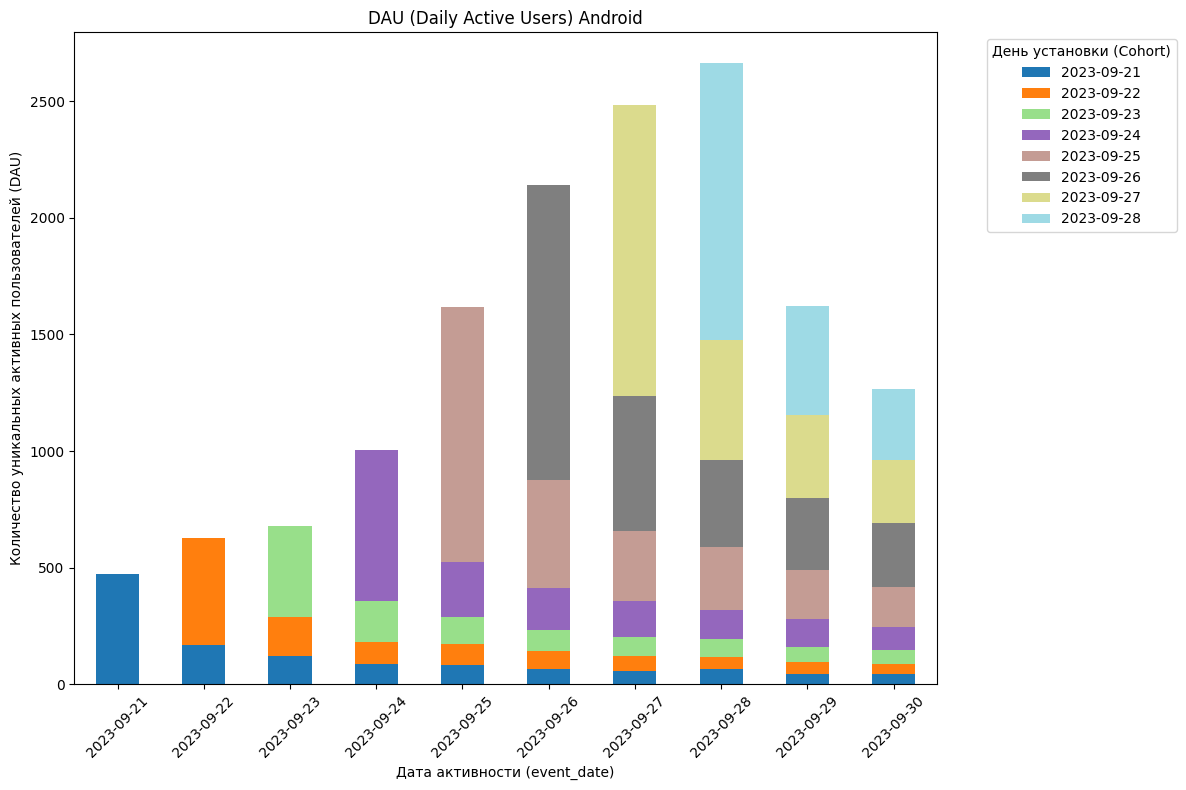

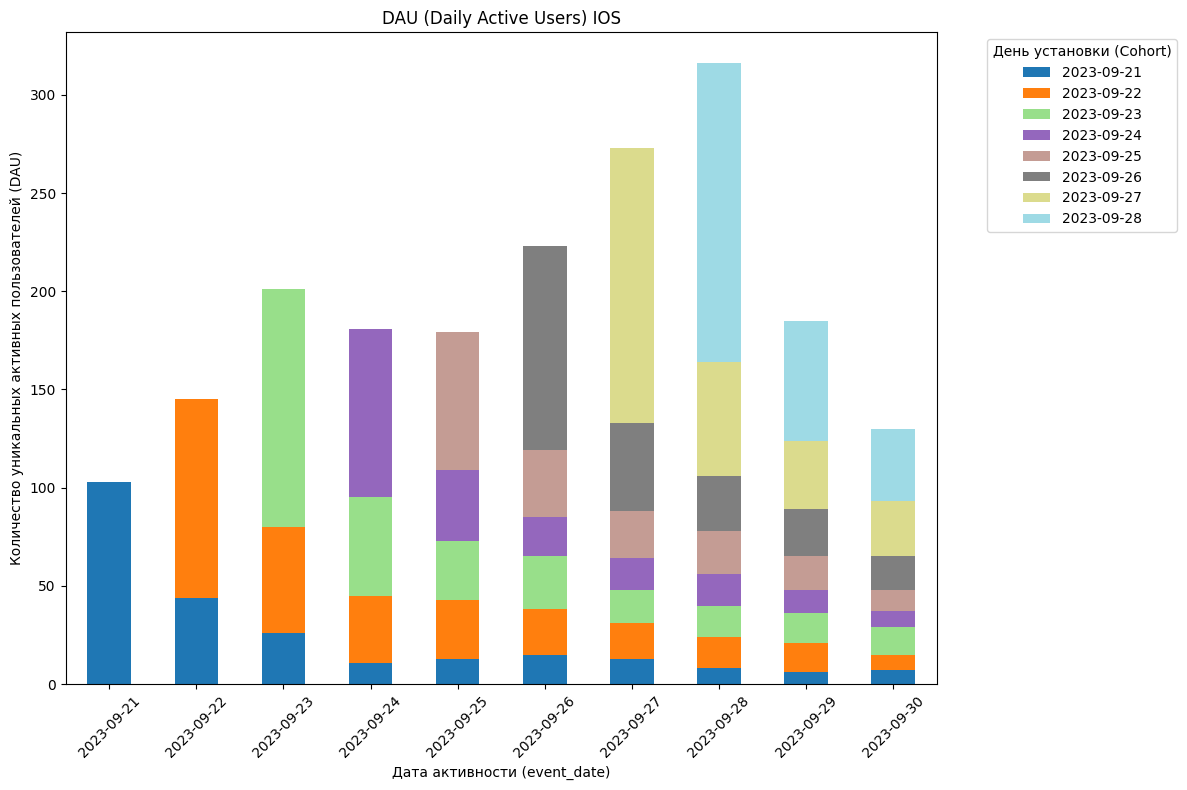

In [19]:
# Строим сводную таблицу активных пользователей для stacked bar chart по дням
pivot_dau = daily_data_android.pivot_table(values='DAU', index='event_date', columns='install_date', aggfunc='sum', fill_value=0)

# android
pivot_dau.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('DAU (Daily Active Users) Android')
plt.xlabel('Дата активности (event_date)')
plt.ylabel('Количество уникальных активных пользователей (DAU)')
plt.xticks(rotation=45)
plt.legend(title='День установки (Cohort)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ios
pivot_dau = daily_data_ios.pivot_table(values='DAU', index='event_date', columns='install_date', aggfunc='sum', fill_value=0)

pivot_dau.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('DAU (Daily Active Users) IOS')
plt.xlabel('Дата активности (event_date)')
plt.ylabel('Количество уникальных активных пользователей (DAU)')
plt.xticks(rotation=45)
plt.legend(title='День установки (Cohort)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Android показывает более высокую активность пользователей, с пиковыми значениями DAU, достигающими более 2500 уникальных активных пользователей в день.

iOS имеет более низкие показатели активности, с максимумом около 300 пользователей в день.

В целом, можно предположить, что на Android пользователи более активно возвращаются в приложение после установки, что может говорить о лучшей вовлеченности или более эффективной рекламе на этой платформе.

#### **Удержание пользователей (Retention)**
Эти таблицы и графики показывают процент удержания пользователей (Retention) для каждой когорты (дата установки) на Android и iOS,
начиная с 0-го дня после установки и до 9-го дня.

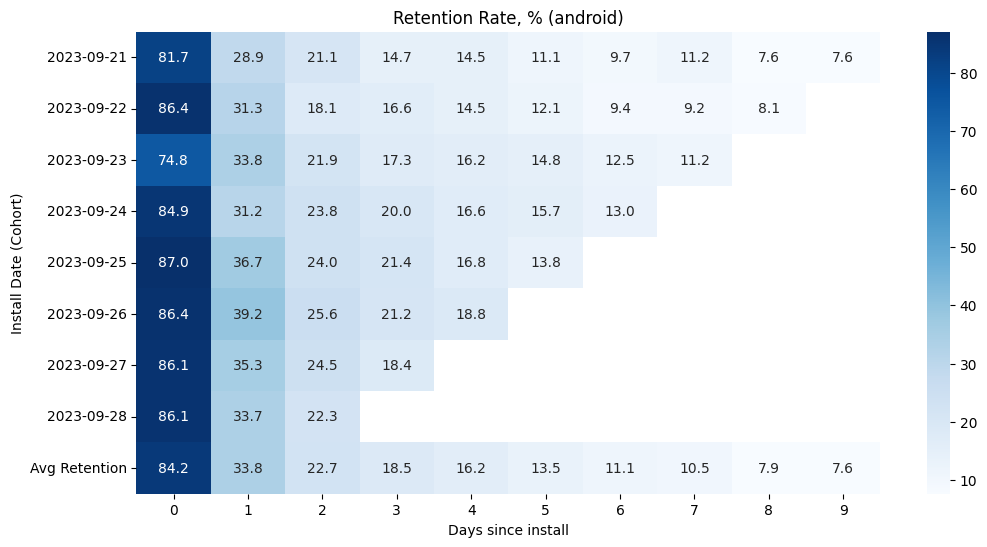

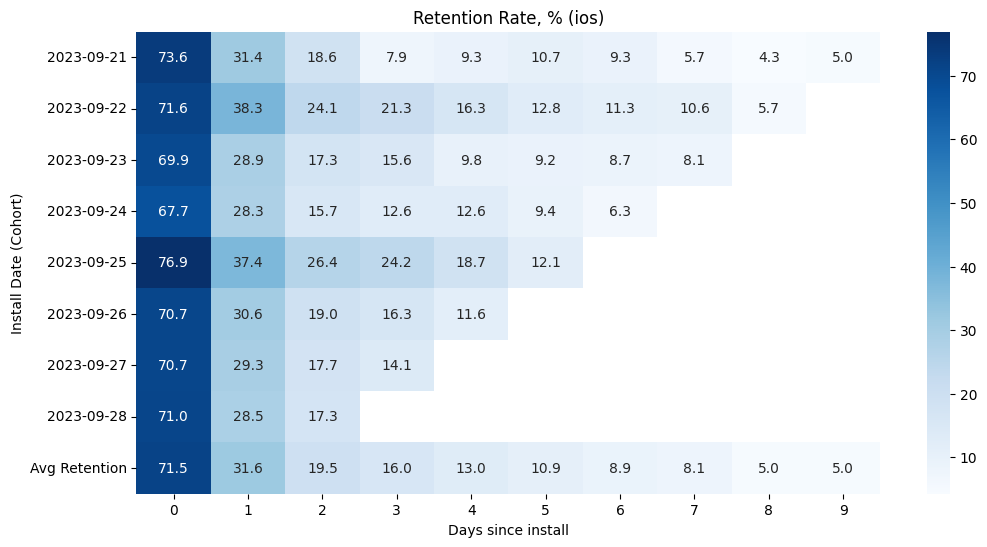

In [20]:
# Рассчитываем среднее значение retention по каждому дню (days_since_install)
mean_retention_android = daily_data_android.groupby('days_since_install')['retention_rate'].mean()
retention_pivot_android = daily_data_android.pivot(index='install_date', columns='days_since_install', values='retention_rate')
retention_pivot_android.loc['Avg Retention'] = mean_retention_android

# Визуализация Retention Rate
plt.figure(figsize=(12, 6))
sns.heatmap(retention_pivot_android, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title('Retention Rate, % (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

# Аналогичный код для iOS
mean_retention_ios = daily_data_ios.groupby('days_since_install')['retention_rate'].mean()
retention_pivot_ios = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='retention_rate')
retention_pivot_ios.loc['Avg Retention'] = mean_retention_ios

plt.figure(figsize=(12, 6))
sns.heatmap(retention_pivot_ios, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title('Retention Rate, % (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

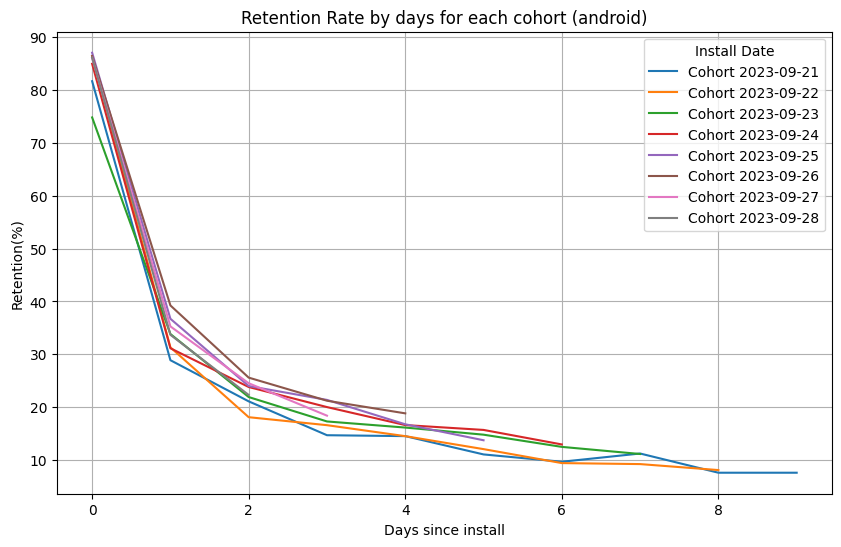

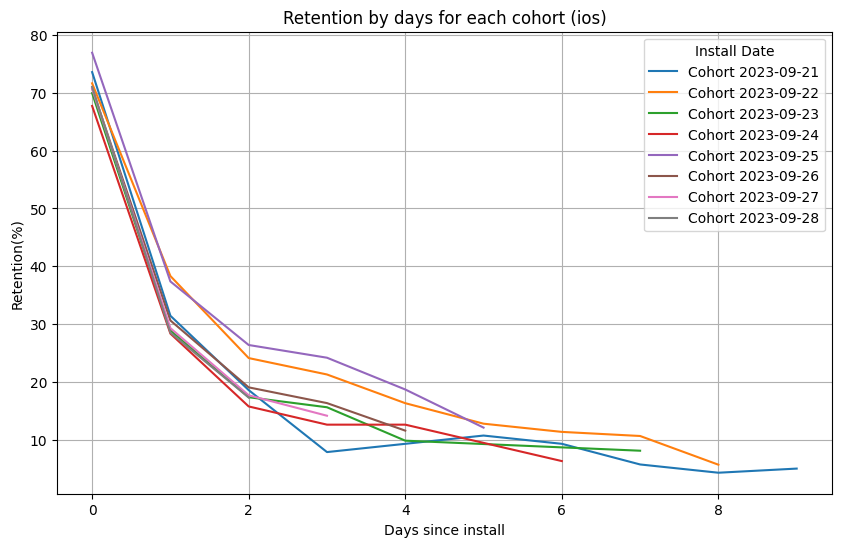

In [21]:
# Строим график Retention для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_android['install_date'].unique():
    cohort_data = daily_data_android[daily_data_android['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['retention_rate'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Retention Rate by days for each cohort (android)')
plt.xlabel('Days since install')
plt.ylabel('Retention(%)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

# Строим график Retention для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_ios['install_date'].unique():
    cohort_data = daily_data_ios[daily_data_ios['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['retention_rate'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Retention by days for each cohort (ios)')
plt.xlabel('Days since install')
plt.ylabel('Retention(%)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

#### **Доход по когортам (Revenue)**

Это таблицы показывают ежедневный доход (Revenue), получаемый от каждой когорты пользователей за каждый день после установки.
Каждая строка в таблице соответствует дате установки (кохорта), а каждый столбец — это день с момента установки (Days since install).

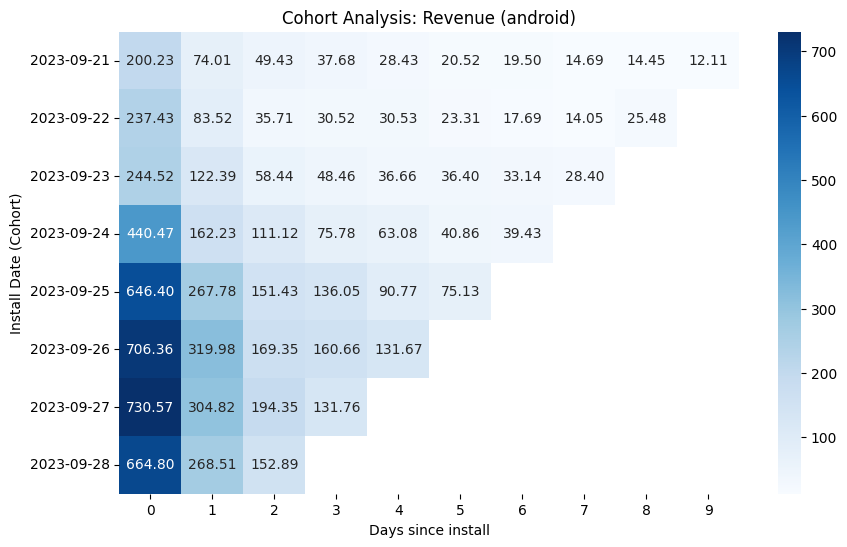

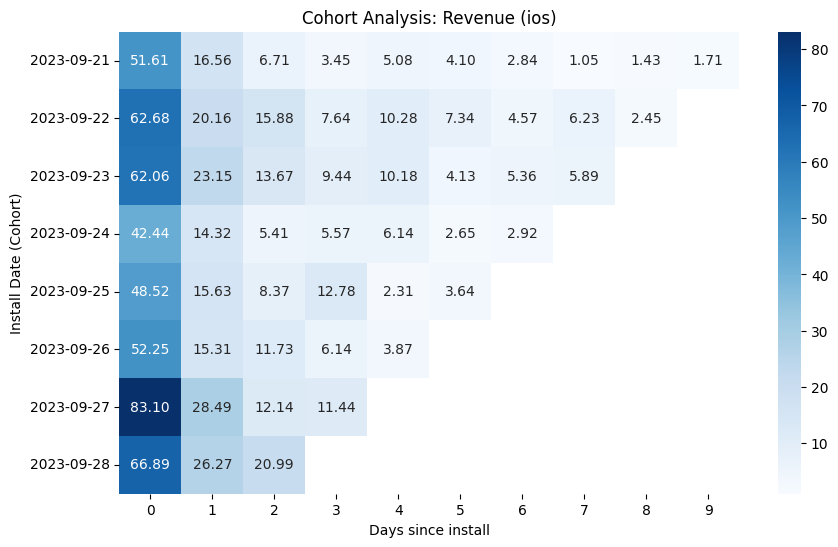

In [22]:
revenue_table = daily_data_android.pivot(index='install_date', columns='days_since_install', values='event_revenue')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

revenue_table = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='event_revenue')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

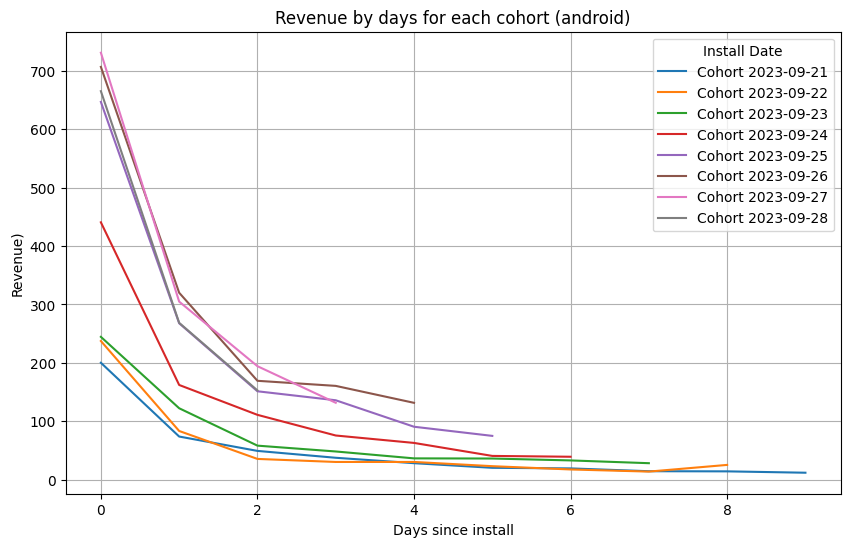

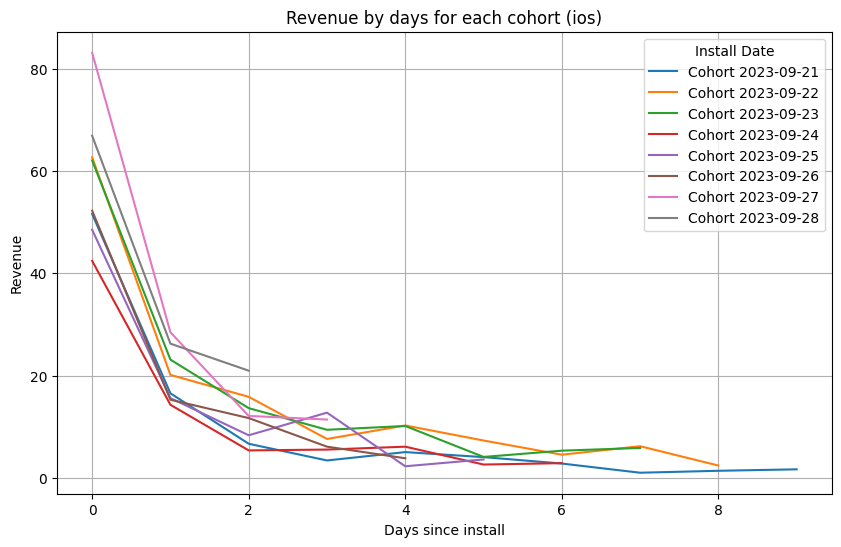

In [23]:
# Строим график revenue для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_android['install_date'].unique():
    cohort_data = daily_data_android[daily_data_android['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['event_revenue'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue by days for each cohort (android)')
plt.xlabel('Days since install')
plt.ylabel('Revenue)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

# Строим график revenue для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_ios['install_date'].unique():
    cohort_data = daily_data_ios[daily_data_ios['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['event_revenue'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue by days for each cohort (ios)')
plt.xlabel('Days since install')
plt.ylabel('Revenue')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

#### **Удержание дохода по когортам**

Это таблицы показывают ежедневный доход (Revenue), получаемый от каждой когорты пользователей за каждый день после установки.
Каждая строка в таблице соответствует дате установки (кохорта), а каждый столбец — это день с момента установки (Days since install).

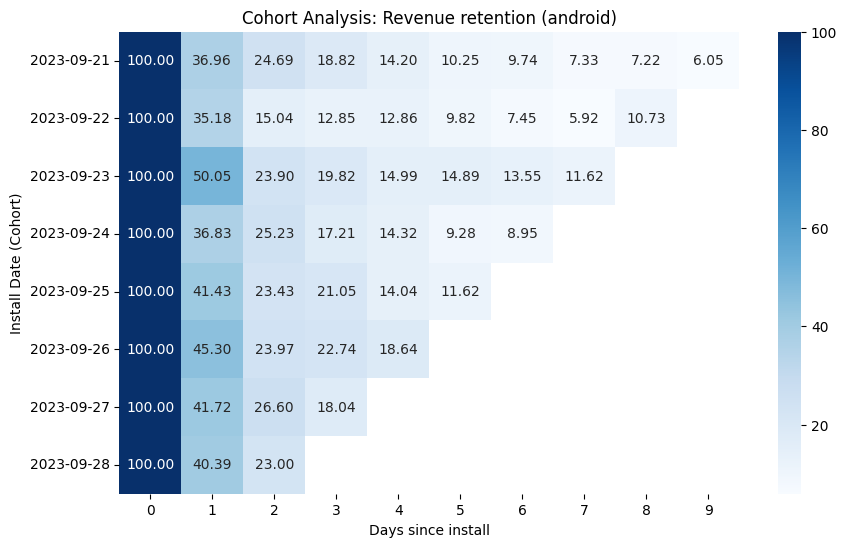

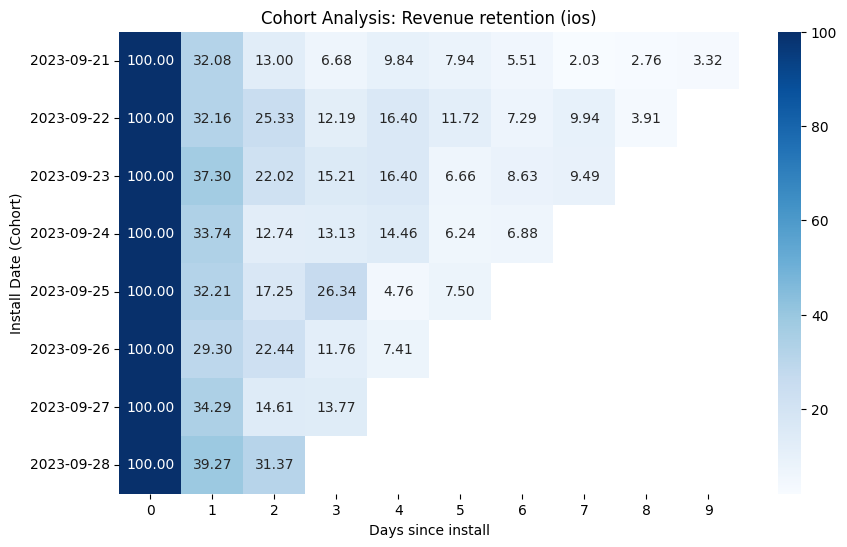

In [24]:
revenue_table = daily_data_android.pivot(index='install_date', columns='days_since_install', values='revenue_retention')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue retention (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

revenue_table = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='revenue_retention')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue retention (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

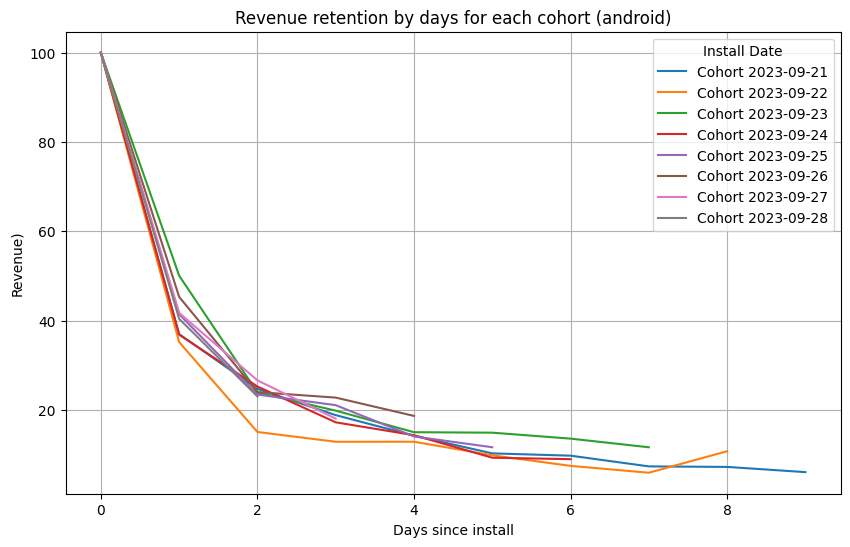

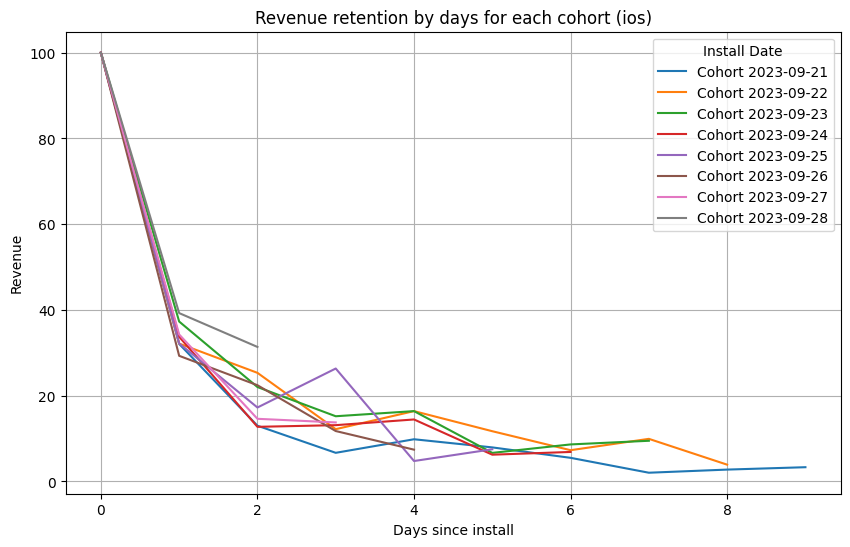

In [25]:
# Строим график revenue для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_android['install_date'].unique():
    cohort_data = daily_data_android[daily_data_android['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['revenue_retention'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue retention by days for each cohort (android)')
plt.xlabel('Days since install')
plt.ylabel('Revenue)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

# Строим график revenue для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_ios['install_date'].unique():
    cohort_data = daily_data_ios[daily_data_ios['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['revenue_retention'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue retention by days for each cohort (ios)')
plt.xlabel('Days since install')
plt.ylabel('Revenue')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

#### **Кумулятивный доход по кагортам (Cumulative Revenue)**


Эти таблицы показывают накопленный (кумулятивный) доход от каждой когорты за каждый день после установки.

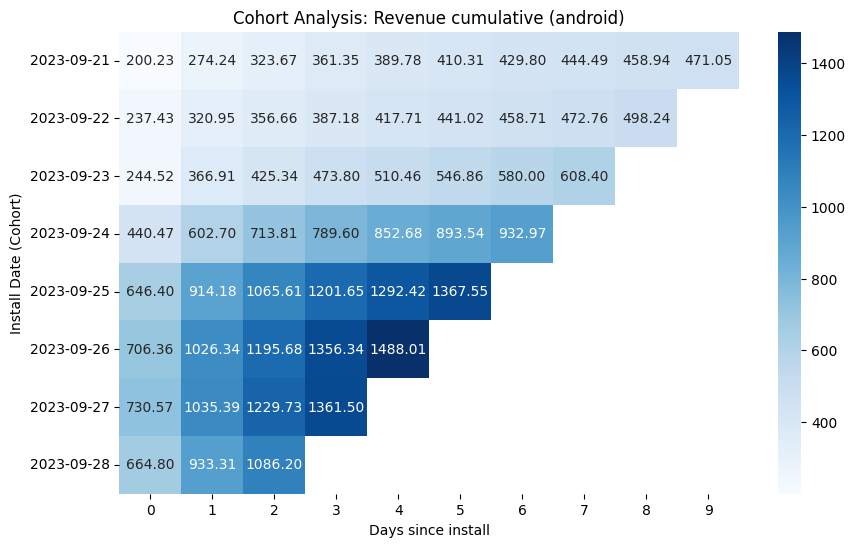

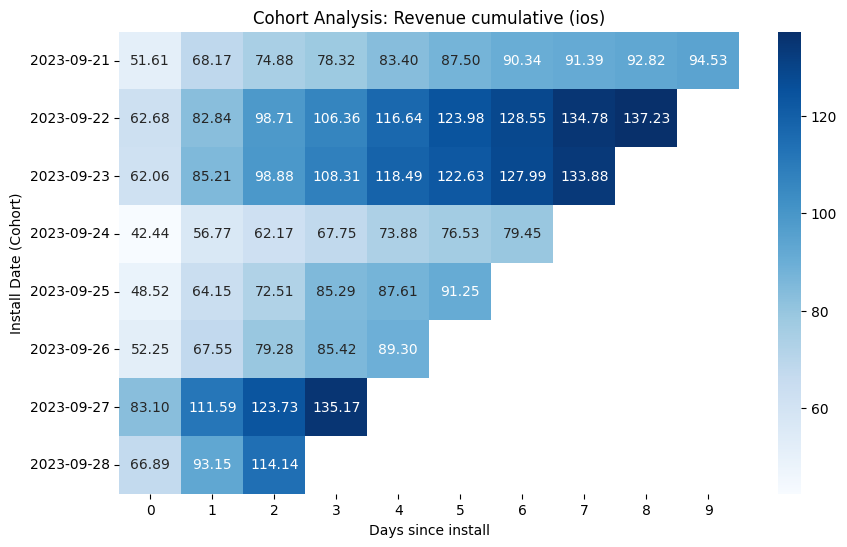

In [26]:
revenue_table = daily_data_android.pivot(index='install_date', columns='days_since_install', values='cumulative_revenue')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue cumulative (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

revenue_table = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='cumulative_revenue')

# Создаем таблицу с подсветкой с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(revenue_table, annot=True, cmap="Blues", fmt=".2f")
plt.title('Cohort Analysis: Revenue cumulative (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

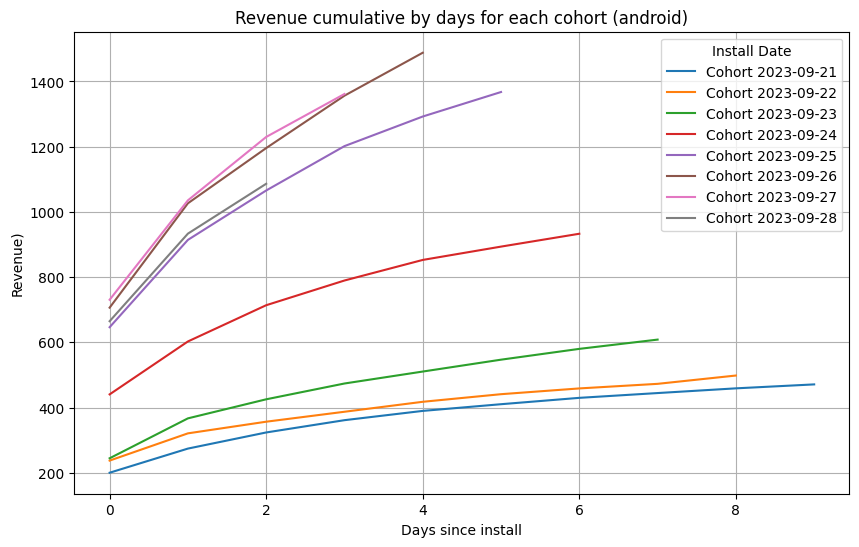

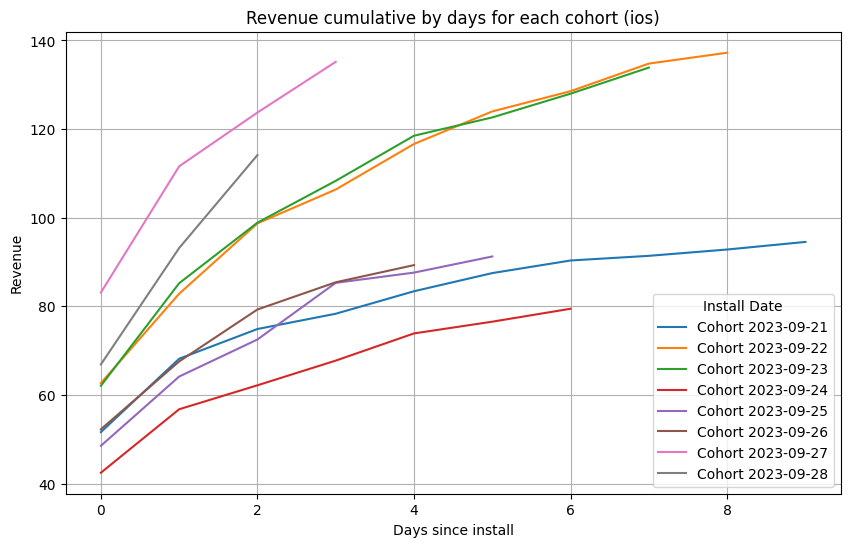

In [27]:
# Строим график revenue для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_android['install_date'].unique():
    cohort_data = daily_data_android[daily_data_android['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['cumulative_revenue'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue cumulative by days for each cohort (android)')
plt.xlabel('Days since install')
plt.ylabel('Revenue)')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

# Строим график revenue для каждой когорты
plt.figure(figsize=(10, 6))

for cohort in daily_data_ios['install_date'].unique():
    cohort_data = daily_data_ios[daily_data_ios['install_date'] == cohort]
    plt.plot(cohort_data['days_since_install'], cohort_data['cumulative_revenue'], label=f'Cohort {pd.to_datetime(cohort).strftime("%Y-%m-%d")}')

plt.title('Revenue cumulative by days for each cohort (ios)')
plt.xlabel('Days since install')
plt.ylabel('Revenue')
plt.legend(title='Install Date')
plt.grid(True)
plt.show()

#### **Анализ среднего дохода на пользователя (ARPU, Avarage Revenue Per User)**

In [28]:
# Подсчитаем количество уникальных пользователей и выручку по платформам
platform_stats = ad_revenue.groupby('platform').agg({
    'user_id': 'nunique',  # Уникальные пользователи
    'event_revenue': 'sum'  # Суммарная выручка
}).reset_index()

# Рассчитаем общий ARPU за весь период
platform_stats['ARPU'] = platform_stats['event_revenue'] / platform_stats['user_id']

# Выведем результат
print(platform_stats)

  platform  user_id  event_revenue      ARPU
0  android     7085    7813.908686  1.102881
1      ios      933     874.936242  0.937767


In [29]:
# Рассчитываем среднее значение ARPU по дням и кагортам
average_arpu_android = daily_data_android['ARPU'].mean()
average_arpu_ios = daily_data_ios['ARPU'].mean()

# Выводим результат
print(f"Средний ARPU для Android: {average_arpu_android:.2f}")
print(f"Средний ARPU для IOS: {average_arpu_ios:.2f}")

Средний ARPU для Android: 0.48
Средний ARPU для IOS: 0.38


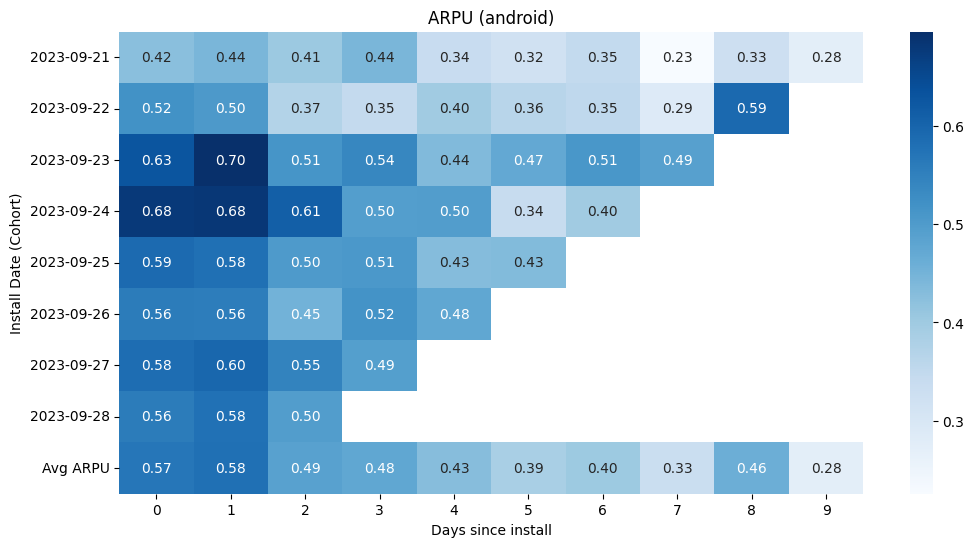

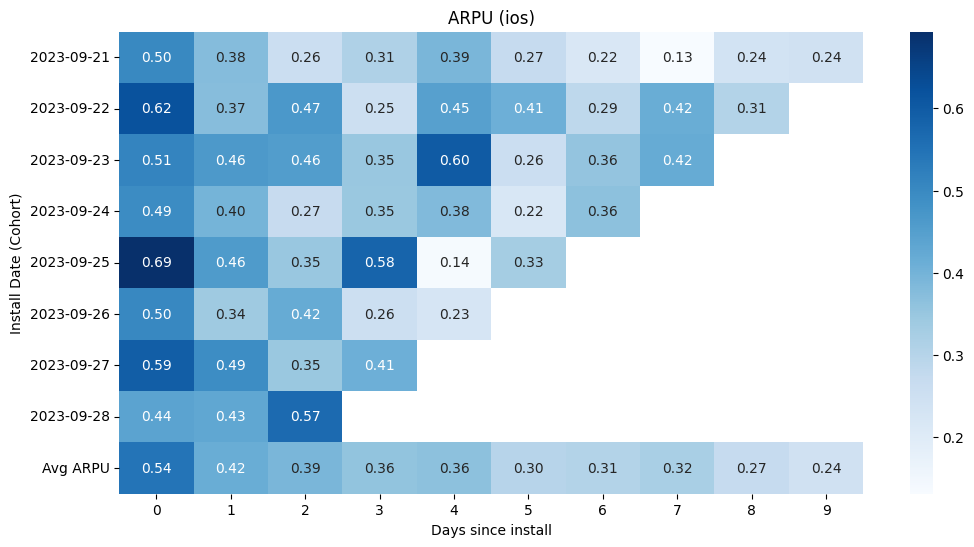

In [30]:
# Рассчитываем среднее значение ARPU по каждому дню (days_since_install)
mean_ARPU_android = daily_data_android.groupby('days_since_install')['ARPU'].mean()
ARPU_pivot_android = daily_data_android.pivot(index='install_date', columns='days_since_install', values='ARPU')
ARPU_pivot_android.loc['Avg ARPU'] = mean_ARPU_android

# Визуализация ARPU
plt.figure(figsize=(12, 6))
sns.heatmap(ARPU_pivot_android, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title('ARPU (android)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

# Аналогичный код для iOS
mean_ARPU_ios = daily_data_ios.groupby('days_since_install')['ARPU'].mean()
ARPU_pivot_ios = daily_data_ios.pivot(index='install_date', columns='days_since_install', values='ARPU')
ARPU_pivot_ios.loc['Avg ARPU'] = mean_ARPU_ios

plt.figure(figsize=(12, 6))
sns.heatmap(ARPU_pivot_ios, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title('ARPU (ios)')
plt.xlabel('Days since install')
plt.ylabel('Install Date (Cohort)')
plt.show()

 На основании предоставленных метрик ARPU можно сделать следующие выводы:

1. Средняя выручка на пользователя за весь период (ARPU):
- Android: Средний ARPU составляет 1.102881 за весь период. Это означает, что каждый пользователь Android в среднем приносит чуть больше одной единицы выручки на протяжении всего времени использования приложения.
- iOS: Средний ARPU составляет 0.937767. Хотя это значение ниже, чем у Android, оно довольно близко к единице, что указывает на стабильную, но меньшую выручку на пользователя по сравнению с Android.
2. Средняя выручка на пользователя в день по когортам:
- Android: Средний дневной ARPU составляет 0.48. Это может свидетельствовать о более активных пользователях на платформе Android, которые приносят значительную часть выручки за короткий период времени.
- iOS: Средний дневной ARPU составляет 0.38, что несколько ниже, чем на Android. Это подтверждает гипотезу о том, что пользователи iOS приносят меньше выручки в день, но при этом более стабильно в течение всего периода использования приложения.

Разница между общим ARPU и средним ARPU по дням может объясняться как наличием пользователей с высокой выручкой, так и тем, что некоторые пользователи совершают регулярные действия в приложении на протяжении длительного времени, что приводит к накоплению выручки. Выбросы и долгосрочная активность являются ключевыми факторами, которые увеличивают общий ARPU по сравнению с дневным.

#### **Прогноз удержания пользователей на 30 день**

На основании представленных данных и графиков я выбрала модель «forgetting curve» (https://app2top.ru/marketing/modeliruem-uderzhanie-pol-zovatelej-v-poiskah-optimal-noj-formuly-99392.html) для описания поведения пользователей, поскольку она наиболее точно отражает характер изменений уровня удержания по когортам на протяжении времени.

1. Резкое снижение удержания в первые дни: Как видно на графиках для платформ Android и iOS, в первые дни после установки приложения уровень удержания пользователей значительно падает. Это согласуется с моделью кривой забывания, которая описывает быструю потерю интереса или информации сразу после первого взаимодействия, если не предприняты специальные меры для их сохранения.

2. Замедление снижения удержания: После первых нескольких дней падение удержания замедляется, что также характерно для кривой забывания. Модель предполагает, что после быстрого начального спада активность или интерес пользователей стабилизируются на более низком уровне, что подтверждается данными.

3. Схожие паттерны среди когорт: Независимо от даты установки, все когорты демонстрируют один и тот же паттерн: резкий спад активности в начале и стабилизация через несколько дней. Это свидетельствует о том, что пользователи проходят через одинаковый процесс потери интереса к приложению, что позволяет обоснованно применить модель забывания.


Исходя из этих факторов, модель «forgetting curve» наиболее адекватно объясняет наблюдаемые тренды в данных и помогает лучше понять поведение пользователей на протяжении первых дней после установки приложения.

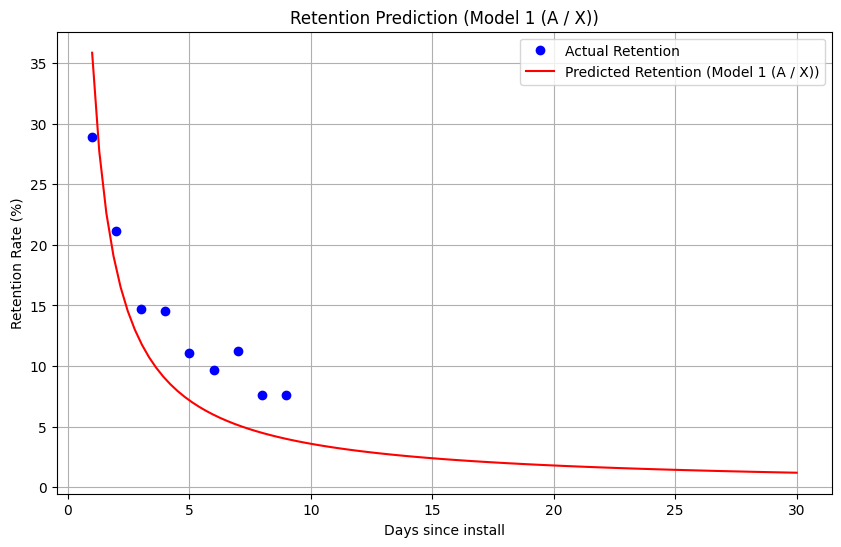

Model 1 (A / X):
Parameters: [35.85914382]
RMSE: 4.55
R^2: 0.52



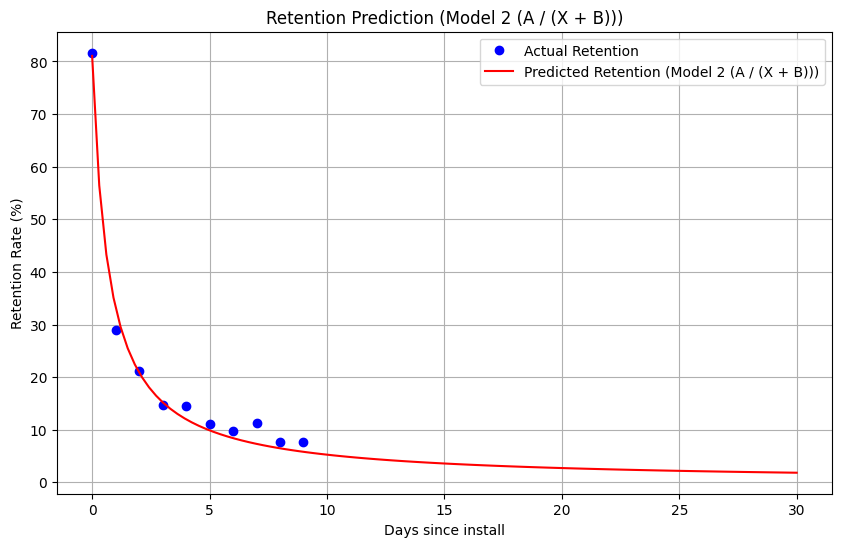

Model 2 (A / (X + B)):
Parameters: [56.31704085  0.69473817]
RMSE: 2.21
R^2: 0.99



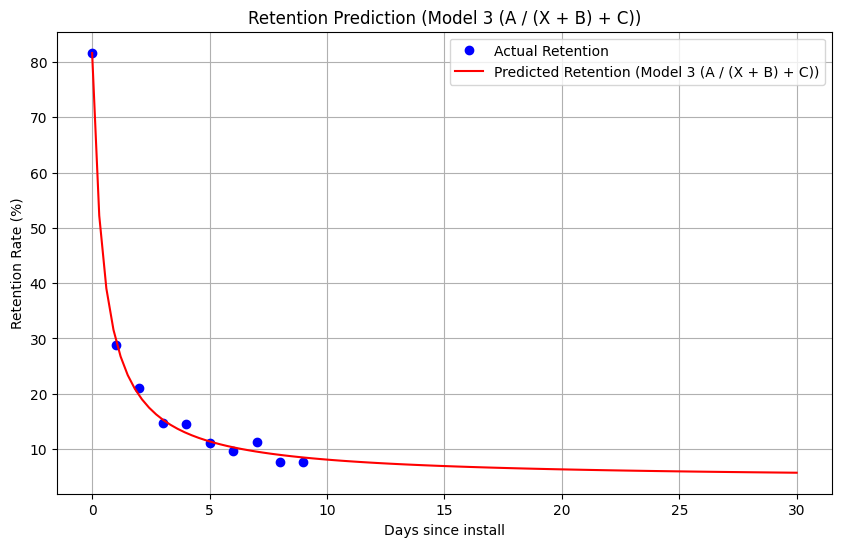

Model 3 (A / (X + B) + C):
Parameters: [37.93455348  0.49182098  4.47615059]
RMSE: 1.09
R^2: 1.00

Optimal Model: Model 3 (A / (X + B) + C)
Parameters: [37.93455348  0.49182098  4.47615059]
RMSE: 1.09
R^2: 1.00


In [31]:
# Данные для первой когорты
cohort_first = daily_data_android[daily_data_android['install_date'] == date(2023, 9, 21)]
days_first_cohort = cohort_first['days_since_install'].values
retention_first_cohort = cohort_first['retention_rate'].values

# Удаляем нулевые значения для модели 1
days_first_cohort_no_zero = days_first_cohort[days_first_cohort > 0]
retention_first_cohort_no_zero = retention_first_cohort[days_first_cohort > 0]

# Определяем модели
def model_1(x, a):  # retention = A / X
    return a / x

def model_2(x, a, b):  # retention = A / (X + B)
    return a / (x + b)

def model_3(x, a, b, c):  # retention = A / (X + B) + C
    return a / (x + b) + c

models = {
    "Model 1 (A / X)": (model_1, [80]),
    "Model 2 (A / (X + B))": (model_2, [80, 1]),
    "Model 3 (A / (X + B) + C)": (model_3, [80, 1, 7]),
}

# Результаты для всех моделей
results = []

for name, (model, initial_params) in models.items():
    try:
        if name == "Model 1 (A / X)":
            # Используем данные без нулей для Model 1
            popt, _ = curve_fit(model, days_first_cohort_no_zero, retention_first_cohort_no_zero, p0=initial_params, maxfev=5000)
            retention_pred_train = model(days_first_cohort_no_zero, *popt)
            days_pred = np.linspace(1, 30, 100)  # Начинаем с 1 для Model 1
        else:
            # Используем полные данные для других моделей
            popt, _ = curve_fit(model, days_first_cohort, retention_first_cohort, p0=initial_params, maxfev=5000)
            retention_pred_train = model(days_first_cohort, *popt)
            days_pred = np.linspace(0, 30, 100)  # Диапазон для предсказаний

        # Прогноз для будущих значений
        retention_pred = model(days_pred, *popt)

        # Оценка метрик
        rmse = np.sqrt(mean_squared_error(retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero, retention_pred_train))
        r2 = r2_score(retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero, retention_pred_train)

        # Сохранение результатов
        results.append((name, popt, rmse, r2))

        # Визуализация
        plt.figure(figsize=(10, 6))
        plt.plot(days_first_cohort if name != "Model 1 (A / X)" else days_first_cohort_no_zero,
                 retention_first_cohort if name != "Model 1 (A / X)" else retention_first_cohort_no_zero,
                 'o', label='Actual Retention', color='blue')
        plt.plot(days_pred, retention_pred, '-', label=f'Predicted Retention ({name})', color='red')
        plt.xlabel('Days since install')
        plt.ylabel('Retention Rate (%)')
        plt.title(f'Retention Prediction ({name})')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Вывод результатов
        print(f'{name}:')
        print(f'Parameters: {popt}')
        print(f'RMSE: {rmse:.2f}')
        print(f'R^2: {r2:.2f}\n')

    except RuntimeError as e:
        print(f'{name} could not be fitted: {e}')
    except ValueError as e:
        print(f'Error with {name}: {e}')

# Оптимальная модель
optimal_model = min(results, key=lambda x: x[2])  # Сравнение по RMSE
print(f'Optimal Model: {optimal_model[0]}')
print(f'Parameters: {optimal_model[1]}')
print(f'RMSE: {optimal_model[2]:.2f}')
print(f'R^2: {optimal_model[3]:.2f}')


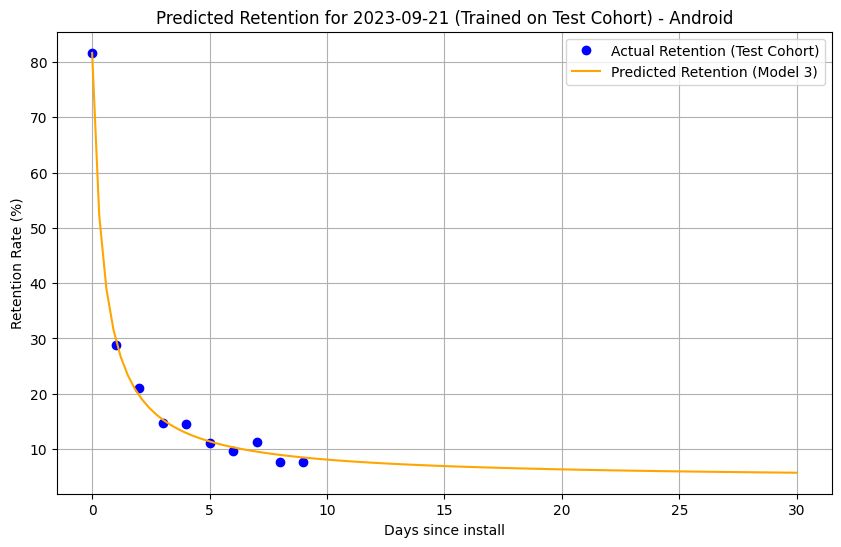

Predicted Retention on Day 30: 5.72%
RMSE: 1.09
R^2: 1.00
Model Parameters: [37.93454552  0.49182089  4.47615217]


In [32]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# Объединяем данные всех когорт
all_cohorts_android = daily_data_android.copy()  # Создаём копию данных

# Преобразуем `install_date` в числовой формат (порядковый номер даты)
all_cohorts_android['install_date_numeric'] = all_cohorts_android['install_date'].map(lambda x: x.toordinal())

# Выбираем тестируемую когорту
test_cohort_date = date(2023, 9, 21)
test_cohort_android = all_cohorts_android[all_cohorts_android['install_date'] == test_cohort_date]

# Разделяем переменные для тестирования
days_test = test_cohort_android['days_since_install'].values
retention_test = test_cohort_android['retention_rate'].values

# Определяем модель 3 (без install_date, но обучаем отдельно)
def model_3(x, a, b, c):  # retention = A / (X + B) + C
    return a / (x + b) + c

# Обучение модели только на тестируемой когорте
p0 = [50, 1, 5]  # Начальные параметры
popt, _ = curve_fit(model_3, days_test, retention_test, p0=p0, maxfev=5000)

# Прогноз для тестируемой когорты (на её же днях)
days_pred = np.linspace(0, 30, 100)
retention_pred = model_3(days_pred, *popt)

# Оценка метрик
retention_pred_test_cohort = model_3(days_test, *popt)
rmse = np.sqrt(mean_squared_error(retention_test, retention_pred_test_cohort))
r2 = r2_score(retention_test, retention_pred_test_cohort)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(days_test, retention_test, 'o', label='Actual Retention (Test Cohort)', color='blue')
plt.plot(days_pred, retention_pred, '-', label='Predicted Retention (Model 3)', color='orange')
plt.xlabel('Days since install')
plt.ylabel('Retention Rate (%)')
plt.title(f'Predicted Retention for {test_cohort_date} (Trained on Test Cohort) - Android')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print(f'Predicted Retention on Day 30: {model_3(30, *popt):.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Model Parameters: {popt}')

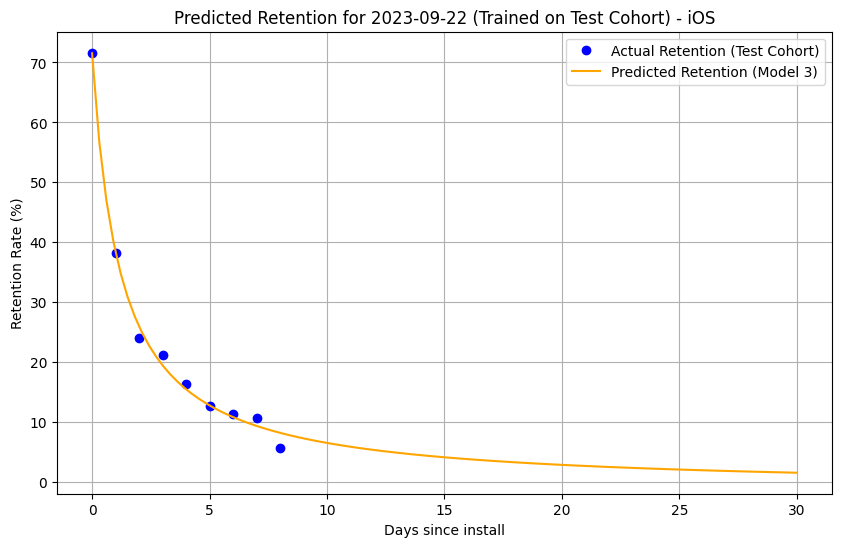

Predicted Retention on Day 30: 1.56%
RMSE: 1.32
R^2: 1.00
Model Parameters: [86.77891389  1.19263832 -1.22045808]


In [33]:
# Объединяем данные всех когорт
daily_data_ios = daily_data_ios.copy()  # Создаём копию данных

# Преобразуем `install_date` в числовой формат (порядковый номер даты)
daily_data_ios['install_date_numeric'] = daily_data_ios['install_date'].map(lambda x: x.toordinal())

# Выбираем тестируемую когорту
test_cohort_date = date(2023, 9, 22)
test_cohort_ios = daily_data_ios[daily_data_ios['install_date'] == test_cohort_date]

# Разделяем переменные для тестирования
days_test = test_cohort_ios['days_since_install'].values
retention_test = test_cohort_ios['retention_rate'].values

# Определяем модель 3 (без install_date, но обучаем отдельно)
def model_3(x, a, b, c):  # retention = A / (X + B) + C
    return a / (x + b) + c

# Обучение модели только на тестируемой когорте
p0 = [50, 1, 5]  # Начальные параметры
popt, _ = curve_fit(model_3, days_test, retention_test, p0=p0, maxfev=5000)

# Прогноз для тестируемой когорты (на её же днях)
days_pred = np.linspace(0, 30, 100)
retention_pred = model_3(days_pred, *popt)

# Оценка метрик
retention_pred_test_cohort = model_3(days_test, *popt)
rmse = np.sqrt(mean_squared_error(retention_test, retention_pred_test_cohort))
r2 = r2_score(retention_test, retention_pred_test_cohort)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(days_test, retention_test, 'o', label='Actual Retention (Test Cohort)', color='blue')
plt.plot(days_pred, retention_pred, '-', label='Predicted Retention (Model 3)', color='orange')
plt.xlabel('Days since install')
plt.ylabel('Retention Rate (%)')
plt.title(f'Predicted Retention for {test_cohort_date} (Trained on Test Cohort) - iOS')
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print(f'Predicted Retention on Day 30: {model_3(30, *popt):.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Model Parameters: {popt}')


### **Проверка гипотез**

#### **Гипотеза 1**

Гипотеза H1: Существует линейная связь между количеством активных пользователей (DAU) и выручкой (Revenue), а нестабильность ARPU (средней выручки на пользователя) делает использование прямого расчёта Revenue менее точным, чем линейная регрессия.

Гипотеза H0: Линейной зависимости между DAU и Revenue нет.


Для проверки гипотезы был проведён корреляционный анализ и построена линейная регрессионная модель

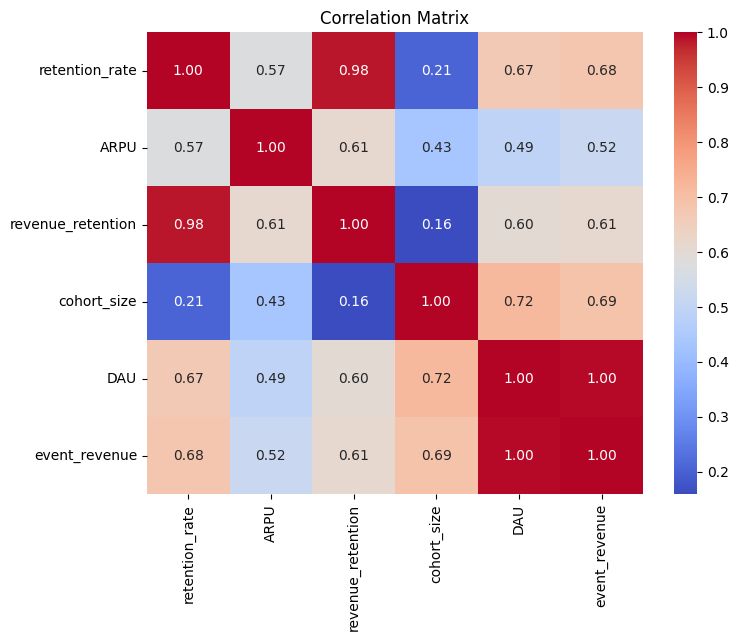

In [34]:
# Выбираем только интересующие нас переменные
correlation_data = daily_data[['retention_rate', 'ARPU', 'revenue_retention', 'cohort_size', 'DAU', 'event_revenue']].dropna()

# Строим матрицу корреляции
correlation_matrix = correlation_data.corr()

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Метрика ARPU нестабильна от дня ко дню из-за колебаний поведения пользователей (например, вариации в затратах, просмотре рекламы, микротранзакциях). Это приводит к тому, что расчёт выручки по формуле:
 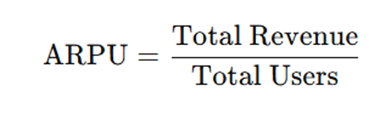



может давать отклонения. Построение регрессионной модели позволяет учесть шум в данных и сгладить вариации, предоставляя более устойчивую оценку зависимости между DAU и Revenue.


In [35]:
import statsmodels.api as sm

# Зависимая переменная
y = correlation_data['event_revenue']

# Независимые переменные
X = correlation_data[['DAU']]
X = sm.add_constant(X)  # Добавляем константу

# Построение модели
model = sm.OLS(y, X).fit()

# Результаты регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          event_revenue   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.023e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          4.19e-104
Time:                        02:36:38   Log-Likelihood:                -425.26
No. Observations:                 104   AIC:                             854.5
Df Residuals:                     102   BIC:                             859.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1480      1.693     -4.812      0.0

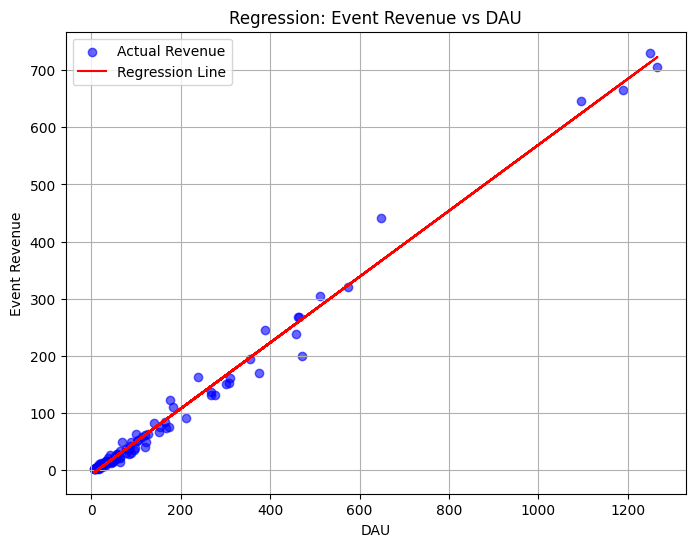

In [36]:
# Рассчёт предсказанных значений
correlation_data['predicted_event_revenue'] = model.predict(X)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(correlation_data['DAU'], correlation_data['event_revenue'], color='blue', alpha=0.6, label='Actual Revenue')
plt.plot(correlation_data['DAU'], correlation_data['predicted_event_revenue'], color='red', label='Regression Line')
plt.title('Regression: Event Revenue vs DAU')
plt.xlabel('DAU')
plt.ylabel('Event Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error

# Модель 1: Предсказание с использованием среднего ARPU
mean_arpu = correlation_data['event_revenue'].sum() / correlation_data['DAU'].sum()
correlation_data['predicted_revenue_arpu'] = correlation_data['DAU'] * mean_arpu

# RMSE для среднего ARPU
rmse_arpu = mean_squared_error(correlation_data['event_revenue'], correlation_data['predicted_revenue_arpu'])

# RMSE для линейной регрессии
rmse_regression = mean_squared_error(correlation_data['event_revenue'], correlation_data['predicted_event_revenue'])

print(f"RMSE (Average ARPU Model): {rmse_arpu:.2f}")
print(f"RMSE (Regression Model): {rmse_regression:.2f}")

RMSE (Average ARPU Model): 373.67
RMSE (Regression Model): 208.57


Выводы

Гипотеза о том, что выручка (event_revenue) линейно зависит от DAU, подтверждается высокой корреляцией и сильным соответствием фактических значений модели.


#### **Гипотеза 2**
Нулевая гипотеза (H₀):
Платформа (iOS или Android) и размер когорты не оказывают значимого влияния на ключевые метрики (retention rate, ARPU, рост доходов). Различия между кластерами являются случайными.

Альтернативная гипотеза (H₁):
Платформа (iOS или Android) и размер когорты оказывают значимое влияние на ключевые метрики (retention rate, ARPU, рост доходов), причём платформенные различия являются определяющим фактором.

После выдвижения гипотезы о том, что платформа (iOS или Android) и размер когорты оказывают значимое влияние на ключевые метрики (retention rate, ARPU, рост доходов), кластерный анализ был выбран как основной метод для её проверки. Кластерный анализ позволяет проверить это, выявляя группы когорт с различными паттернами по ключевым метрикам.


In [197]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Оставляем только первые 3 дней
filtered_data = daily_data[daily_data['days_since_install'] <= 2]

# Создаём таблицу с когортными метриками
cohort_metrics = filtered_data.groupby(['install_date', 'platform']).agg({
    'retention_rate': 'mean',
    'ARPU': 'mean',
    'cohort_size': 'mean'
}).reset_index()

# Масштабируем данные
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(cohort_metrics[['retention_rate', 'ARPU', 'cohort_size']])

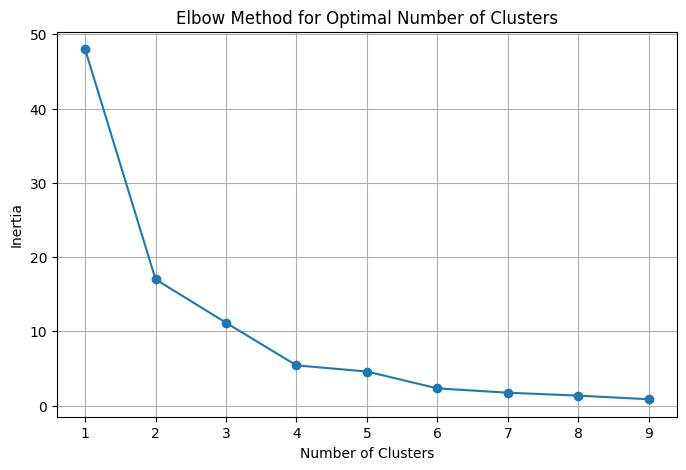

In [198]:
# Вычисление инерции для разного количества кластеров
inertia = []
cluster_range = range(1, 10)  # Проверяем от 1 до 10 кластеров

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_metrics)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.grid()
plt.show()

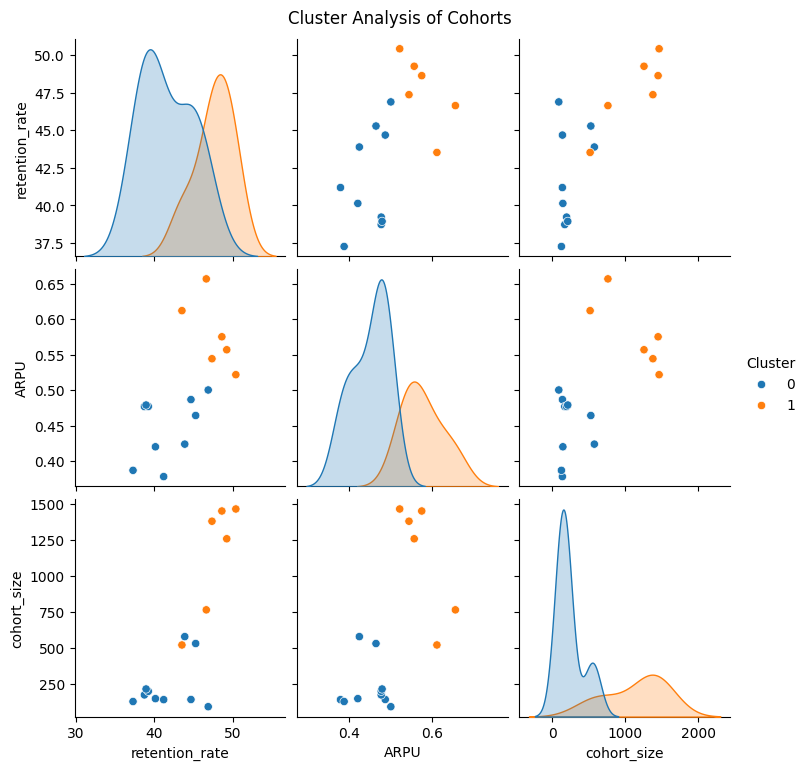

In [199]:
# Кластеризация
kmeans = KMeans(n_clusters=2, random_state=42)
cohort_metrics['Cluster'] = kmeans.fit_predict(scaled_metrics)

# Визуализация
sns.pairplot(cohort_metrics, hue='Cluster', diag_kind='kde')
plt.suptitle("Cluster Analysis of Cohorts", y=1.02)
plt.show()

In [200]:
# Группируем данные по кластерам и считаем средние значения
cluster_summary = cohort_metrics.groupby('Cluster').agg({
    'retention_rate': ['mean', 'std', 'min', 'max'],
    'ARPU': ['mean', 'std', 'min', 'max'],
    'cohort_size': ['mean', 'std', 'min', 'max']
})

cluster_summary

retention_rate                                      ARPU            \
                  mean       std        min        max      mean       std   
Cluster                                                                      
0            41.622888  3.303873  37.270341  46.886447  0.449592  0.043526   
1            47.640903  2.422375  43.525641  50.420933  0.578024  0.049202   

                             cohort_size                             
              min       max         mean         std    min     max  
Cluster                                                              
0        0.378465  0.500464   233.900000  172.665669   91.0   578.0  
1        0.522007  0.656949  1139.666667  399.911324  520.0  1465.0

In [201]:
# Отфильтровываем данные для кластера 0
cluster_0_data = cohort_metrics[cohort_metrics['Cluster'] == 0]

# Отфильтровываем данные для кластера 1
cluster_1_data = cohort_metrics[cohort_metrics['Cluster'] == 1]

print("Cluster 0 Data:")
cluster_0_data

Cluster 0 Data:


,install_date,platform,retention_rate,ARPU,cohort_size,Cluster
0,2023-09-21,android,43.886967,0.424189,578.0,0
1,2023-09-21,ios,41.190476,0.378465,140.0,0
2,2023-09-22,android,45.283019,0.464505,530.0,0
3,2023-09-22,ios,44.680851,0.486956,141.0,0
5,2023-09-23,ios,38.728324,0.477143,173.0,0
7,2023-09-24,ios,37.270341,0.387247,127.0,0
9,2023-09-25,ios,46.886447,0.500464,91.0,0
11,2023-09-26,ios,40.136054,0.420448,147.0,0
13,2023-09-27,ios,39.225589,0.477241,198.0,0
15,2023-09-28,ios,38.940810,0.479261,214.0,0


In [202]:
print("\nCluster 1 Data:")
cluster_1_data


Cluster 1 Data:


,install_date,platform,retention_rate,ARPU,cohort_size,Cluster
4,2023-09-23,android,43.525641,0.612196,520.0,1
6,2023-09-24,android,46.640489,0.656949,764.0,1
8,2023-09-25,android,49.258082,0.557115,1258.0,1
10,2023-09-26,android,50.420933,0.522007,1465.0,1
12,2023-09-27,android,48.633127,0.575398,1451.0,1
14,2023-09-28,android,47.367150,0.544479,1380.0,1


In [203]:
from scipy.stats import f_oneway

# Предположим, что данные уже есть в cohort_metrics с колонкой 'Cluster'
# cohort_metrics содержит: ['Cluster', 'retention_rate', 'ARPU', 'revenue_growth']

# Разделение данных на кластеры
cluster_0 = cohort_metrics[cohort_metrics['Cluster'] == 0]
cluster_1 = cohort_metrics[cohort_metrics['Cluster'] == 1]

# ANOVA для метрики ARPU
anova_arpu = f_oneway(cluster_0['ARPU'], cluster_1['ARPU'])
print(f"ANOVA for ARPU:\nF-statistic: {anova_arpu.statistic:.2f}, p-value: {anova_arpu.pvalue:.4f}\n")

# ANOVA для метрики Retention Rate
anova_retention = f_oneway(cluster_0['retention_rate'], cluster_1['retention_rate'])
print(f"ANOVA for Retention Rate:\nF-statistic: {anova_retention.statistic:.2f}, p-value: {anova_retention.pvalue:.4f}\n")

# Интерпретация результатов
if anova_arpu.pvalue < 0.05:
    print("Различия в ARPU между кластерами статистически значимы.")
else:
    print("Различия в ARPU между кластерами не значимы.")

if anova_retention.pvalue < 0.05:
    print("Различия в Retention Rate между кластерами статистически значимы.")
else:
    print("Различия в Retention Rate между кластерами не значимы.")

ANOVA for ARPU:
F-statistic: 29.70, p-value: 0.0001

ANOVA for Retention Rate:
F-statistic: 14.90, p-value: 0.0017

Различия в ARPU между кластерами статистически значимы.
Различия в Retention Rate между кластерами статистически значимы.


**Выводы**

Различия в поведении платформ:

- Cluster 1 состоит из пользователей Android, которые демонстрируют более высокий уровень удержания, больший ARPU и более быстрый рост выручки. Кроме того, размер когорт в этом кластере значительно больше (в среднем 1258-1465 пользователей), что усиливает их общий вклад в метрики.
- Cluster 0 включает в основном пользователей iOS, но в среднем показывает более низкие метрики удержания, ARPU и роста выручки. Размер когорт в этом кластере также существенно меньше (в среднем 91-578 пользователей), что может свидетельствовать о меньшей вовлеченности и активности этих пользователей.

Гипотеза подтверждается:
Платформа является ключевым фактором, влияющим на метрики, а размер когорты усиливает различия.


#### Более подробный кластерный анализ с разделением метрик по дням после установки

In [189]:
# Фильтрация данных за первые 3 дня
filtered_data = daily_data[daily_data['days_since_install'] <= 2]

# Удержание по дням
retention_by_day = filtered_data.pivot_table(
    index=['install_date', 'platform'],
    columns='days_since_install',
    values='retention_rate',
    aggfunc='mean'
).reset_index()

# ARPU по дням
arpu_by_day = filtered_data.pivot_table(
    index=['install_date', 'platform'],
    columns='days_since_install',
    values='ARPU',
    aggfunc='mean'
).reset_index()

# Переименование колонок для удобства
retention_by_day.columns = ['install_date', 'platform', 'retention_day_0', 'retention_day_1', 'retention_day_2']
arpu_by_day.columns = ['install_date', 'platform', 'arpu_day_0', 'arpu_day_1', 'arpu_day_2']

# Объединение таблиц
cohort_metrics = pd.merge(retention_by_day, arpu_by_day, on=['install_date', 'platform'])


# Масштабируем данные
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(cohort_metrics[
    [
        'retention_day_0', 'retention_day_1', 'retention_day_2',
        'arpu_day_0', 'arpu_day_1', 'arpu_day_2'
    ]
])

# Кластеризация
kmeans = KMeans(n_clusters=2, random_state=42)
cohort_metrics['Cluster'] = kmeans.fit_predict(scaled_metrics)


In [190]:
# Вывод данных кластеров
cluster_0_data = cohort_metrics[cohort_metrics['Cluster'] == 0]
cluster_1_data = cohort_metrics[cohort_metrics['Cluster'] == 1]

In [191]:
cluster_0_data

,install_date,platform,retention_day_0,retention_day_1,retention_day_2,arpu_day_0,arpu_day_1,arpu_day_2,Cluster
0,2023-09-21,android,81.660900,28.892734,21.107266,0.424219,0.443160,0.405189,0
1,2023-09-21,ios,73.571429,31.428571,18.571429,0.501066,0.376311,0.258017,0
2,2023-09-22,android,86.415094,31.320755,18.113208,0.518412,0.503115,0.371987,0
5,2023-09-23,ios,69.942197,28.901734,17.341040,0.512909,0.462974,0.455545,0
7,2023-09-24,ios,67.716535,28.346457,15.748031,0.493535,0.397840,0.270366,0
11,2023-09-26,ios,70.748299,30.612245,19.047619,0.502362,0.340196,0.418787,0
13,2023-09-27,ios,70.707071,29.292929,17.676768,0.593569,0.491243,0.346910,0
15,2023-09-28,ios,71.028037,28.504673,17.289720,0.440038,0.430582,0.567163,0


In [192]:
cluster_1_data

,install_date,platform,retention_day_0,retention_day_1,retention_day_2,arpu_day_0,arpu_day_1,arpu_day_2,Cluster
3,2023-09-22,ios,71.631206,38.297872,24.113475,0.620580,0.373290,0.466998,1
4,2023-09-23,android,74.807692,33.846154,21.923077,0.628575,0.695395,0.512619,1
6,2023-09-24,android,84.947644,31.151832,23.821990,0.678692,0.681631,0.610523,1
8,2023-09-25,android,87.042925,36.724960,24.006359,0.590315,0.579620,0.501410,1
9,2023-09-25,ios,76.923077,37.362637,26.373626,0.693150,0.459590,0.348651,1
10,2023-09-26,android,86.416382,39.249147,25.597270,0.557945,0.556488,0.451587,1
12,2023-09-27,android,86.078567,35.286010,24.534804,0.584922,0.595350,0.545923,1
14,2023-09-28,android,86.086957,33.695652,22.318841,0.559596,0.577434,0.496408,1


In [193]:
# Статистика по кластерам
cluster_summary = cohort_metrics.groupby('Cluster').agg({
    'retention_day_0': ['mean', 'min', 'max'],
    'retention_day_1': ['mean', 'min', 'max'],
    'retention_day_2': ['mean', 'min', 'max'],
    'arpu_day_0': ['mean', 'min', 'max'],
    'arpu_day_1': ['mean', 'min', 'max'],
    'arpu_day_2': ['mean', 'min', 'max']
}).reset_index()

cluster_summary

Cluster retention_day_0                       retention_day_1             \
                     mean        min        max            mean        min   
0       0       73.973695  67.716535  86.415094       29.662512  28.346457   
1       1       81.741806  71.631206  87.042925       35.701783  31.151832   

             retention_day_2                       arpu_day_0            \
         max            mean        min        max       mean       min   
0  31.428571       18.111885  15.748031  21.107266   0.498264  0.424219   
1  39.249147       24.086180  21.923077  26.373626   0.614222  0.557945   

            arpu_day_1                     arpu_day_2                      
        max       mean       min       max       mean       min       max  
0  0.593569   0.430678  0.340196  0.503115   0.386745  0.258017  0.567163  
1  0.693150   0.564850  0.373290  0.695395   0.491765  0.348651  0.610523

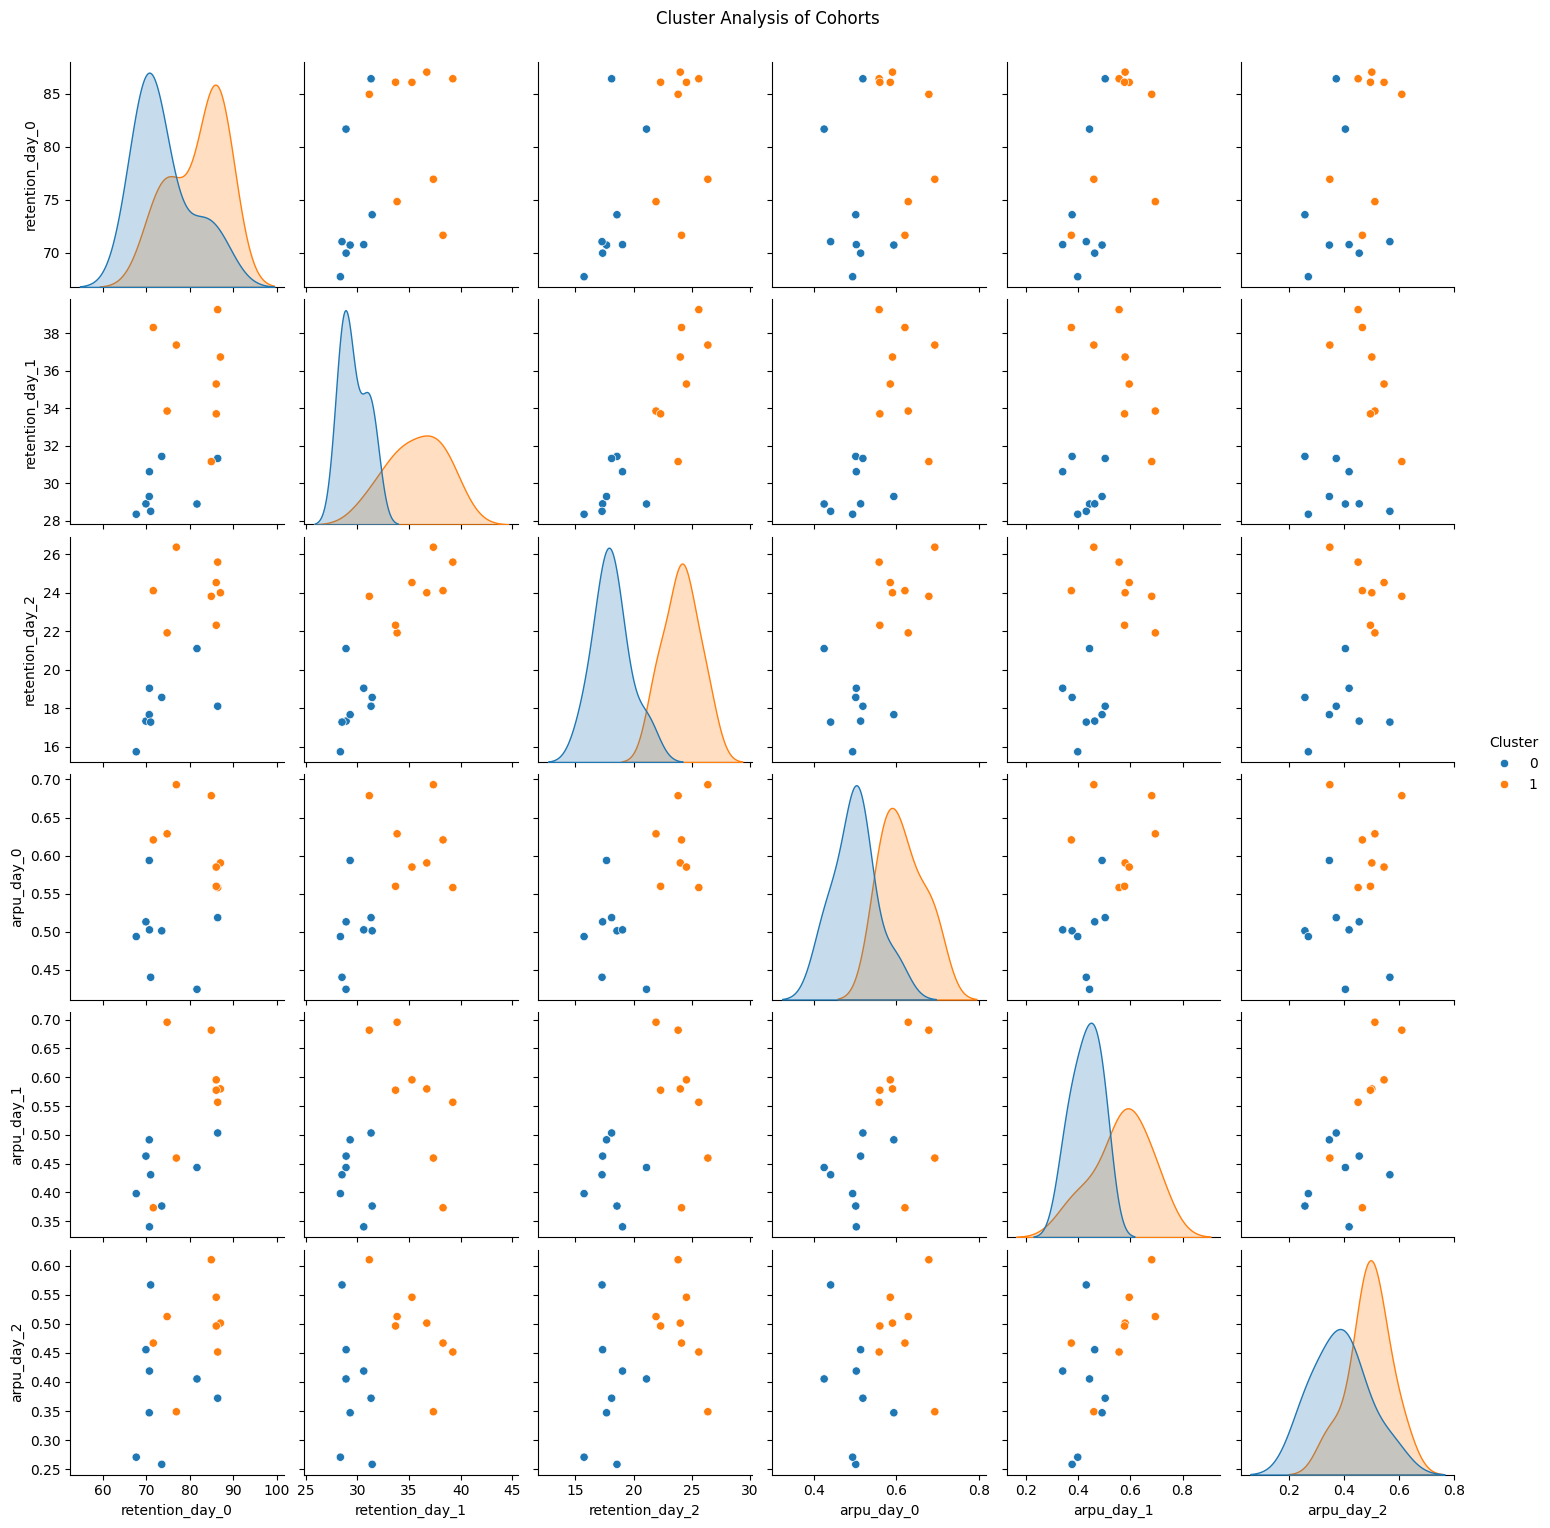

In [194]:
# Визуализация
sns.pairplot(cohort_metrics, hue='Cluster', diag_kind='kde')
plt.suptitle("Cluster Analysis of Cohorts", y=1.02)
plt.show()